In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

In [29]:
df = pd.read_csv('downloaded_from_mendeley/weaving_rejection_dataset - original.csv')

In [30]:
df.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300.0,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,40x40/110x90,10450.0,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,40x40/110x80,900.0,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,40x40/130x80,8000.0,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,50x50/140x70,3500.0,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [31]:
df= df[['Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 'Shrink_allow', 'Req_grey_fabric', 
    'Req_beam_length(yds)', 'warp_count',  'weft_count','epi', 'ppi', 'Rejection']]

In [32]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,Rejection
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,double_40,80.0,110,80,285
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40.0,110,90,39
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40.0,110,80,0
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40.0,130,80,58
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50.0,140,70,1043


In [33]:
df['FF_grs'] = pd.cut(df['Req_Finish_Fabrics'],6)

In [34]:
df['Rec_BL_grs']= pd.cut(df['Rec_Beam_length(yds)'],4)

In [35]:
df['SA_grs']= pd.cut(df['Shrink_allow'], 6)

In [36]:
df['FA_grs']= pd.cut(df['Fabric_Allowance'], 6)

In [37]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,Rejection,FF_grs,Rec_BL_grs,SA_grs,FA_grs
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,double_40,80.0,110,80,285,"(28841.667, 57633.333]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40.0,110,90,39,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40.0,110,80,0,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40.0,130,80,58,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50.0,140,70,1043,"(-122.75, 28841.667]","(-248.329, 73062.049]","(5.965, 11.8]","(4.961, 11.5]"


In [38]:
def label_encoding(x):
    def resultant_count(x1,x2):
        return int( (x1*x2)/(x1+x2) ) 
    if x == 'double_80':
        return resultant_count(80,80)
    elif x == 'double_40':
        return resultant_count(40,40)
    else:
        return int(x)

In [39]:
df['warp_count']= df['warp_count'].apply(lambda x: label_encoding(x))

In [40]:
X = df.copy()
y = X.pop('Rejection')

In [41]:
X.dtypes

Req_Finish_Fabrics       float64
Fabric_Allowance         float64
Rec_Beam_length(yds)     float64
Shrink_allow             float64
Req_grey_fabric          float64
Req_beam_length(yds)     float64
warp_count                 int64
weft_count               float64
epi                        int64
ppi                        int64
FF_grs                  category
Rec_BL_grs              category
SA_grs                  category
FA_grs                  category
dtype: object

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [44]:
X_train.head(1)

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,FF_grs,Rec_BL_grs,SA_grs,FA_grs
2569,250.0,22.0,382.76,23.0,320.512821,380.624009,40,40.0,110,90,"(-122.75, 28841.667]","(-248.329, 73062.049]","(17.6, 23.4]","(18.0, 24.5]"


# Label Encoder

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()

In [47]:
X_train['FF_grs'] = le.fit_transform(X_train['FF_grs'])
X_test['FF_grs'] = le.transform(X_test['FF_grs'])

In [48]:
X_train['Rec_BL_grs'] = le.fit_transform(X_train['Rec_BL_grs'])
X_test['Rec_BL_grs'] = le.transform(X_test['Rec_BL_grs'])

In [49]:
X_train['SA_grs']= le.fit_transform(X_train['SA_grs'])
X_test['SA_grs']= le.transform(X_test['SA_grs'])

In [50]:
X_train['FA_grs']= le.fit_transform(X_train['FA_grs'])
X_test['FA_grs']= le.transform(X_test['FA_grs'])

In [51]:
X_train.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,FF_grs,Rec_BL_grs,SA_grs,FA_grs
2569,250.0,22.0,382.760,23.0,320.512821,380.624009,40,40.0,110,90,0,0,2,2
2976,100.0,37.2,153.104,15.1,159.235669,171.503965,40,40.0,100,70,0,0,1,4
13508,4750.0,10.2,136.700,17.0,5289.532294,5827.478488,40,40.0,120,80,0,0,1,0
5169,2250.0,8.2,2673.852,8.2,2450.980392,2441.398392,50,50.0,150,96,0,0,0,0
15152,2150.0,8.2,2679.320,13.4,2342.047930,2472.973059,50,50.0,130,80,0,0,1,0


In [52]:
X_all = pd.concat([X_train, X_test], axis=0)

In [53]:
y_all = pd.concat([y_train, y_test], axis=0)

In [54]:
X_all.shape, y_all.shape

((22010, 14), (22010,))

In [55]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

# r2 score calculation

In [56]:
from sklearn.metrics import r2_score
def calculate_r2_score(models, X_train, y_train, X_test):
    r2_dict ={}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_score_ = r2_score(y_test, y_pred)
        r2_dict[model_name] = r2_score_
    return r2_dict

In [58]:
r2_dict_df=calculate_r2_score(models, X_train, y_train, X_test)

Learning rate set to 0.064417
0:	learn: 156.2096231	total: 141ms	remaining: 2m 21s
1:	learn: 149.3972612	total: 145ms	remaining: 1m 12s
2:	learn: 143.0261994	total: 148ms	remaining: 49.1s
3:	learn: 137.1492493	total: 152ms	remaining: 37.9s
4:	learn: 131.6663981	total: 155ms	remaining: 30.9s
5:	learn: 126.7122696	total: 158ms	remaining: 26.2s
6:	learn: 121.8855078	total: 161ms	remaining: 22.8s
7:	learn: 117.4222067	total: 164ms	remaining: 20.3s
8:	learn: 113.1949798	total: 166ms	remaining: 18.3s
9:	learn: 109.3394728	total: 169ms	remaining: 16.7s
10:	learn: 105.9950148	total: 171ms	remaining: 15.4s
11:	learn: 102.9471904	total: 174ms	remaining: 14.3s
12:	learn: 100.1621650	total: 176ms	remaining: 13.3s
13:	learn: 97.4997410	total: 178ms	remaining: 12.6s
14:	learn: 95.1773870	total: 182ms	remaining: 11.9s
15:	learn: 92.7124150	total: 184ms	remaining: 11.3s
16:	learn: 90.5638356	total: 186ms	remaining: 10.8s
17:	learn: 88.6590309	total: 189ms	remaining: 10.3s
18:	learn: 86.8156647	total: 

183:	learn: 53.9227557	total: 600ms	remaining: 2.66s
184:	learn: 53.7709810	total: 602ms	remaining: 2.65s
185:	learn: 53.7364775	total: 605ms	remaining: 2.65s
186:	learn: 53.6880641	total: 607ms	remaining: 2.64s
187:	learn: 53.5298572	total: 610ms	remaining: 2.63s
188:	learn: 53.4926344	total: 612ms	remaining: 2.63s
189:	learn: 53.4367181	total: 615ms	remaining: 2.62s
190:	learn: 53.4140305	total: 618ms	remaining: 2.62s
191:	learn: 53.3556785	total: 620ms	remaining: 2.61s
192:	learn: 53.3257366	total: 623ms	remaining: 2.6s
193:	learn: 53.2735291	total: 626ms	remaining: 2.6s
194:	learn: 53.2188002	total: 629ms	remaining: 2.59s
195:	learn: 53.1838997	total: 631ms	remaining: 2.59s
196:	learn: 53.1352376	total: 635ms	remaining: 2.59s
197:	learn: 53.1035032	total: 638ms	remaining: 2.58s
198:	learn: 53.0580503	total: 641ms	remaining: 2.58s
199:	learn: 53.0255128	total: 644ms	remaining: 2.57s
200:	learn: 52.8954322	total: 648ms	remaining: 2.58s
201:	learn: 52.8662297	total: 651ms	remaining: 2

424:	learn: 47.3336965	total: 1.22s	remaining: 1.65s
425:	learn: 47.3262246	total: 1.22s	remaining: 1.65s
426:	learn: 47.3045956	total: 1.23s	remaining: 1.65s
427:	learn: 47.2886528	total: 1.23s	remaining: 1.64s
428:	learn: 47.2734759	total: 1.23s	remaining: 1.64s
429:	learn: 47.2648754	total: 1.24s	remaining: 1.64s
430:	learn: 47.2508116	total: 1.24s	remaining: 1.63s
431:	learn: 47.2349406	total: 1.24s	remaining: 1.63s
432:	learn: 47.2240431	total: 1.24s	remaining: 1.63s
433:	learn: 47.2073058	total: 1.25s	remaining: 1.62s
434:	learn: 47.1880670	total: 1.25s	remaining: 1.62s
435:	learn: 47.1819384	total: 1.25s	remaining: 1.62s
436:	learn: 47.1787796	total: 1.25s	remaining: 1.61s
437:	learn: 47.1687903	total: 1.25s	remaining: 1.61s
438:	learn: 47.1515213	total: 1.26s	remaining: 1.61s
439:	learn: 47.1451704	total: 1.26s	remaining: 1.6s
440:	learn: 47.1336207	total: 1.26s	remaining: 1.6s
441:	learn: 47.1178185	total: 1.26s	remaining: 1.6s
442:	learn: 47.1129489	total: 1.27s	remaining: 1.

587:	learn: 45.7454487	total: 1.61s	remaining: 1.13s
588:	learn: 45.7410079	total: 1.62s	remaining: 1.13s
589:	learn: 45.7320733	total: 1.62s	remaining: 1.13s
590:	learn: 45.7241193	total: 1.62s	remaining: 1.12s
591:	learn: 45.7184487	total: 1.62s	remaining: 1.12s
592:	learn: 45.7155512	total: 1.63s	remaining: 1.12s
593:	learn: 45.7132375	total: 1.63s	remaining: 1.11s
594:	learn: 45.7040441	total: 1.63s	remaining: 1.11s
595:	learn: 45.6992600	total: 1.63s	remaining: 1.11s
596:	learn: 45.6953601	total: 1.64s	remaining: 1.1s
597:	learn: 45.6911782	total: 1.64s	remaining: 1.1s
598:	learn: 45.6874472	total: 1.64s	remaining: 1.1s
599:	learn: 45.6772367	total: 1.64s	remaining: 1.09s
600:	learn: 45.6706257	total: 1.64s	remaining: 1.09s
601:	learn: 45.6595130	total: 1.65s	remaining: 1.09s
602:	learn: 45.6350399	total: 1.65s	remaining: 1.08s
603:	learn: 45.6258998	total: 1.65s	remaining: 1.08s
604:	learn: 45.6127795	total: 1.65s	remaining: 1.08s
605:	learn: 45.6068849	total: 1.66s	remaining: 1.

745:	learn: 44.7478322	total: 2.02s	remaining: 687ms
746:	learn: 44.7461923	total: 2.02s	remaining: 684ms
747:	learn: 44.7433328	total: 2.02s	remaining: 681ms
748:	learn: 44.7375341	total: 2.03s	remaining: 679ms
749:	learn: 44.7293691	total: 2.03s	remaining: 676ms
750:	learn: 44.7250356	total: 2.03s	remaining: 674ms
751:	learn: 44.7217414	total: 2.03s	remaining: 671ms
752:	learn: 44.7185425	total: 2.04s	remaining: 668ms
753:	learn: 44.7125915	total: 2.04s	remaining: 666ms
754:	learn: 44.7113836	total: 2.05s	remaining: 664ms
755:	learn: 44.7072543	total: 2.05s	remaining: 661ms
756:	learn: 44.7014931	total: 2.05s	remaining: 659ms
757:	learn: 44.6988275	total: 2.06s	remaining: 657ms
758:	learn: 44.6962772	total: 2.06s	remaining: 654ms
759:	learn: 44.6930664	total: 2.06s	remaining: 652ms
760:	learn: 44.6855941	total: 2.06s	remaining: 649ms
761:	learn: 44.6838772	total: 2.07s	remaining: 646ms
762:	learn: 44.6806598	total: 2.07s	remaining: 644ms
763:	learn: 44.6784081	total: 2.08s	remaining:

974:	learn: 43.9121424	total: 2.62s	remaining: 67.3ms
975:	learn: 43.9103709	total: 2.63s	remaining: 64.6ms
976:	learn: 43.8974398	total: 2.63s	remaining: 61.9ms
977:	learn: 43.8921538	total: 2.63s	remaining: 59.2ms
978:	learn: 43.8890601	total: 2.63s	remaining: 56.5ms
979:	learn: 43.8864010	total: 2.64s	remaining: 53.8ms
980:	learn: 43.8801010	total: 2.64s	remaining: 51.1ms
981:	learn: 43.8772035	total: 2.64s	remaining: 48.5ms
982:	learn: 43.8749157	total: 2.65s	remaining: 45.8ms
983:	learn: 43.8733239	total: 2.65s	remaining: 43.1ms
984:	learn: 43.8699124	total: 2.65s	remaining: 40.4ms
985:	learn: 43.8685492	total: 2.65s	remaining: 37.7ms
986:	learn: 43.8664562	total: 2.65s	remaining: 35ms
987:	learn: 43.8627316	total: 2.66s	remaining: 32.3ms
988:	learn: 43.8600568	total: 2.66s	remaining: 29.6ms
989:	learn: 43.8580732	total: 2.66s	remaining: 26.9ms
990:	learn: 43.8566998	total: 2.66s	remaining: 24.2ms
991:	learn: 43.8525858	total: 2.67s	remaining: 21.5ms
992:	learn: 43.8517292	total: 

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.456e+07, tolerance: 4.724e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.457e+07, tolerance: 4.724e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87379.44199764729, tolerance: 38993.206351898916
  model = c

In [59]:
r2_score_df = pd.DataFrame()
r2_score_df['models']= r2_dict_df.keys()
r2_score_df['r2_scores']= r2_dict_df.values()

In [60]:
r2_score_df.to_csv('r2_score_dataset_8_no_ohe_gr_sc.csv', index = False)

In [61]:
r2_score_df

,models,r2_scores
0,light_gbm,0.936232
1,rnf,0.954302
2,cat,0.936235
3,xgboost,0.956627
4,lr,0.645677
5,laso,0.635897
6,elastonet,0.635883
7,elastonet_cv,0.632351
8,ridge,0.645676
9,decision_tree,0.955443


In [29]:
cv_scores ={}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_all, y_all, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.065627
0:	learn: 159.8189700	total: 151ms	remaining: 2m 30s
1:	learn: 152.5705093	total: 154ms	remaining: 1m 16s
2:	learn: 145.6991921	total: 158ms	remaining: 52.4s
3:	learn: 139.3151909	total: 161ms	remaining: 40s
4:	learn: 133.4958626	total: 164ms	remaining: 32.6s
5:	learn: 127.9540465	total: 167ms	remaining: 27.6s
6:	learn: 122.7872312	total: 170ms	remaining: 24.1s
7:	learn: 118.1517320	total: 172ms	remaining: 21.4s
8:	learn: 113.8078136	total: 175ms	remaining: 19.2s
9:	learn: 109.8998898	total: 177ms	remaining: 17.5s
10:	learn: 106.2325626	total: 179ms	remaining: 16.1s
11:	learn: 103.0807297	total: 182ms	remaining: 15s
12:	learn: 99.9306829	total: 185ms	remaining: 14s
13:	learn: 97.0994761	total: 187ms	remaining: 13.2s
14:	learn: 94.6124675	total: 190ms	remaining: 12.5s
15:	learn: 92.1706234	total: 192ms	remaining: 11.8s
16:	learn: 89.9189532	total: 195ms	remaining: 11.2s
17:	learn: 87.8342615	total: 197ms	remaining: 10.8s
18:	learn: 85.9224945	total: 200ms	r

181:	learn: 53.7129016	total: 605ms	remaining: 2.72s
182:	learn: 53.6554888	total: 608ms	remaining: 2.71s
183:	learn: 53.6315723	total: 610ms	remaining: 2.71s
184:	learn: 53.5804108	total: 613ms	remaining: 2.7s
185:	learn: 53.5485297	total: 615ms	remaining: 2.69s
186:	learn: 53.5240332	total: 618ms	remaining: 2.69s
187:	learn: 53.5051952	total: 620ms	remaining: 2.68s
188:	learn: 53.4359466	total: 623ms	remaining: 2.67s
189:	learn: 53.2836590	total: 625ms	remaining: 2.67s
190:	learn: 53.2550492	total: 628ms	remaining: 2.66s
191:	learn: 53.1676290	total: 630ms	remaining: 2.65s
192:	learn: 53.1324925	total: 633ms	remaining: 2.65s
193:	learn: 53.1032476	total: 635ms	remaining: 2.64s
194:	learn: 53.0481213	total: 638ms	remaining: 2.63s
195:	learn: 52.9180936	total: 640ms	remaining: 2.63s
196:	learn: 52.8876853	total: 643ms	remaining: 2.62s
197:	learn: 52.8619640	total: 645ms	remaining: 2.61s
198:	learn: 52.8212325	total: 647ms	remaining: 2.61s
199:	learn: 52.7689042	total: 650ms	remaining: 

345:	learn: 48.7890336	total: 1s	remaining: 1.9s
346:	learn: 48.7439011	total: 1s	remaining: 1.89s
347:	learn: 48.7250699	total: 1.01s	remaining: 1.89s
348:	learn: 48.7045599	total: 1.01s	remaining: 1.88s
349:	learn: 48.6853321	total: 1.01s	remaining: 1.88s
350:	learn: 48.6730379	total: 1.01s	remaining: 1.88s
351:	learn: 48.6479599	total: 1.02s	remaining: 1.87s
352:	learn: 48.6248356	total: 1.02s	remaining: 1.87s
353:	learn: 48.6096748	total: 1.02s	remaining: 1.87s
354:	learn: 48.5927661	total: 1.02s	remaining: 1.86s
355:	learn: 48.5802841	total: 1.03s	remaining: 1.86s
356:	learn: 48.5611680	total: 1.03s	remaining: 1.86s
357:	learn: 48.5382919	total: 1.03s	remaining: 1.85s
358:	learn: 48.5235092	total: 1.03s	remaining: 1.85s
359:	learn: 48.5020613	total: 1.04s	remaining: 1.84s
360:	learn: 48.4839798	total: 1.04s	remaining: 1.84s
361:	learn: 48.4727182	total: 1.04s	remaining: 1.84s
362:	learn: 48.4547505	total: 1.04s	remaining: 1.83s
363:	learn: 48.4379532	total: 1.05s	remaining: 1.83s


509:	learn: 46.6820653	total: 1.4s	remaining: 1.35s
510:	learn: 46.6715382	total: 1.41s	remaining: 1.35s
511:	learn: 46.6668673	total: 1.41s	remaining: 1.34s
512:	learn: 46.6546022	total: 1.41s	remaining: 1.34s
513:	learn: 46.6511815	total: 1.41s	remaining: 1.34s
514:	learn: 46.6471107	total: 1.42s	remaining: 1.33s
515:	learn: 46.6338168	total: 1.42s	remaining: 1.33s
516:	learn: 46.6246405	total: 1.42s	remaining: 1.33s
517:	learn: 46.6119447	total: 1.42s	remaining: 1.32s
518:	learn: 46.5972739	total: 1.43s	remaining: 1.32s
519:	learn: 46.5924110	total: 1.43s	remaining: 1.32s
520:	learn: 46.5885270	total: 1.43s	remaining: 1.31s
521:	learn: 46.5777237	total: 1.43s	remaining: 1.31s
522:	learn: 46.5722025	total: 1.44s	remaining: 1.31s
523:	learn: 46.5685842	total: 1.44s	remaining: 1.31s
524:	learn: 46.5628893	total: 1.44s	remaining: 1.3s
525:	learn: 46.5546685	total: 1.44s	remaining: 1.3s
526:	learn: 46.5368585	total: 1.45s	remaining: 1.3s
527:	learn: 46.5162028	total: 1.45s	remaining: 1.2

676:	learn: 45.4547858	total: 1.8s	remaining: 861ms
677:	learn: 45.4511897	total: 1.81s	remaining: 858ms
678:	learn: 45.4440225	total: 1.81s	remaining: 856ms
679:	learn: 45.4377557	total: 1.81s	remaining: 853ms
680:	learn: 45.4302081	total: 1.81s	remaining: 850ms
681:	learn: 45.4268840	total: 1.82s	remaining: 847ms
682:	learn: 45.4227402	total: 1.82s	remaining: 845ms
683:	learn: 45.4172496	total: 1.82s	remaining: 842ms
684:	learn: 45.4139435	total: 1.82s	remaining: 839ms
685:	learn: 45.4053869	total: 1.83s	remaining: 837ms
686:	learn: 45.3997273	total: 1.83s	remaining: 834ms
687:	learn: 45.3958984	total: 1.83s	remaining: 831ms
688:	learn: 45.3896349	total: 1.83s	remaining: 828ms
689:	learn: 45.3831933	total: 1.84s	remaining: 826ms
690:	learn: 45.3780614	total: 1.84s	remaining: 823ms
691:	learn: 45.3716775	total: 1.84s	remaining: 820ms
692:	learn: 45.3676956	total: 1.84s	remaining: 817ms
693:	learn: 45.3633197	total: 1.85s	remaining: 815ms
694:	learn: 45.3601812	total: 1.85s	remaining: 

843:	learn: 44.6944013	total: 2.21s	remaining: 408ms
844:	learn: 44.6905919	total: 2.21s	remaining: 405ms
845:	learn: 44.6856506	total: 2.21s	remaining: 403ms
846:	learn: 44.6812220	total: 2.21s	remaining: 400ms
847:	learn: 44.6757947	total: 2.22s	remaining: 397ms
848:	learn: 44.6745874	total: 2.22s	remaining: 395ms
849:	learn: 44.6706583	total: 2.22s	remaining: 392ms
850:	learn: 44.6694886	total: 2.22s	remaining: 389ms
851:	learn: 44.6679738	total: 2.23s	remaining: 387ms
852:	learn: 44.6664909	total: 2.23s	remaining: 384ms
853:	learn: 44.6627295	total: 2.23s	remaining: 381ms
854:	learn: 44.6598673	total: 2.23s	remaining: 379ms
855:	learn: 44.6587588	total: 2.24s	remaining: 376ms
856:	learn: 44.6567823	total: 2.24s	remaining: 373ms
857:	learn: 44.6503649	total: 2.24s	remaining: 371ms
858:	learn: 44.6455559	total: 2.24s	remaining: 368ms
859:	learn: 44.6396499	total: 2.25s	remaining: 366ms
860:	learn: 44.6367212	total: 2.25s	remaining: 363ms
861:	learn: 44.6330172	total: 2.25s	remaining:

Learning rate set to 0.065627
0:	learn: 158.9651540	total: 3.39ms	remaining: 3.39s
1:	learn: 151.7178092	total: 5.79ms	remaining: 2.89s
2:	learn: 144.8711591	total: 8.14ms	remaining: 2.71s
3:	learn: 138.4714794	total: 10.8ms	remaining: 2.69s
4:	learn: 132.5814169	total: 14.7ms	remaining: 2.92s
5:	learn: 127.2630268	total: 17.6ms	remaining: 2.92s
6:	learn: 122.1947089	total: 20.5ms	remaining: 2.9s
7:	learn: 117.7099036	total: 23.1ms	remaining: 2.87s
8:	learn: 113.3749203	total: 25.9ms	remaining: 2.86s
9:	learn: 109.5164356	total: 28.7ms	remaining: 2.84s
10:	learn: 106.0798930	total: 31.2ms	remaining: 2.81s
11:	learn: 102.8852554	total: 34ms	remaining: 2.8s
12:	learn: 99.8822567	total: 36.9ms	remaining: 2.8s
13:	learn: 97.0858241	total: 39.5ms	remaining: 2.78s
14:	learn: 94.6816429	total: 42.5ms	remaining: 2.79s
15:	learn: 92.4369556	total: 46.3ms	remaining: 2.85s
16:	learn: 90.2633361	total: 49.6ms	remaining: 2.87s
17:	learn: 88.1206862	total: 52.5ms	remaining: 2.86s
18:	learn: 86.22536

187:	learn: 54.0868994	total: 592ms	remaining: 2.56s
188:	learn: 54.0110795	total: 598ms	remaining: 2.56s
189:	learn: 53.9437298	total: 600ms	remaining: 2.56s
190:	learn: 53.9072324	total: 607ms	remaining: 2.57s
191:	learn: 53.7336198	total: 611ms	remaining: 2.57s
192:	learn: 53.7119966	total: 614ms	remaining: 2.57s
193:	learn: 53.5917046	total: 618ms	remaining: 2.56s
194:	learn: 53.5644550	total: 625ms	remaining: 2.58s
195:	learn: 53.5031762	total: 630ms	remaining: 2.58s
196:	learn: 53.4471164	total: 637ms	remaining: 2.59s
197:	learn: 53.3099294	total: 642ms	remaining: 2.6s
198:	learn: 53.2713843	total: 646ms	remaining: 2.6s
199:	learn: 53.2100634	total: 650ms	remaining: 2.6s
200:	learn: 53.1853839	total: 659ms	remaining: 2.62s
201:	learn: 53.1103375	total: 662ms	remaining: 2.61s
202:	learn: 53.0829541	total: 670ms	remaining: 2.63s
203:	learn: 53.0575648	total: 675ms	remaining: 2.63s
204:	learn: 52.9740021	total: 679ms	remaining: 2.63s
205:	learn: 52.9536645	total: 690ms	remaining: 2.

378:	learn: 48.4603039	total: 1.56s	remaining: 2.55s
379:	learn: 48.4536507	total: 1.56s	remaining: 2.54s
380:	learn: 48.4399133	total: 1.56s	remaining: 2.54s
381:	learn: 48.3986388	total: 1.57s	remaining: 2.54s
382:	learn: 48.3784136	total: 1.57s	remaining: 2.53s
383:	learn: 48.3632108	total: 1.58s	remaining: 2.53s
384:	learn: 48.3471090	total: 1.58s	remaining: 2.53s
385:	learn: 48.3288212	total: 1.59s	remaining: 2.53s
386:	learn: 48.2984119	total: 1.59s	remaining: 2.52s
387:	learn: 48.2907522	total: 1.6s	remaining: 2.52s
388:	learn: 48.2522820	total: 1.6s	remaining: 2.52s
389:	learn: 48.2281394	total: 1.6s	remaining: 2.51s
390:	learn: 48.2235764	total: 1.61s	remaining: 2.51s
391:	learn: 48.2155156	total: 1.62s	remaining: 2.51s
392:	learn: 48.1990661	total: 1.62s	remaining: 2.5s
393:	learn: 48.1765191	total: 1.63s	remaining: 2.5s
394:	learn: 48.1724700	total: 1.63s	remaining: 2.5s
395:	learn: 48.1297896	total: 1.64s	remaining: 2.49s
396:	learn: 48.1200478	total: 1.64s	remaining: 2.49s

539:	learn: 46.3873152	total: 2.32s	remaining: 1.98s
540:	learn: 46.3796570	total: 2.33s	remaining: 1.97s
541:	learn: 46.3750696	total: 2.33s	remaining: 1.97s
542:	learn: 46.3697240	total: 2.33s	remaining: 1.97s
543:	learn: 46.3620346	total: 2.34s	remaining: 1.96s
544:	learn: 46.3598965	total: 2.35s	remaining: 1.96s
545:	learn: 46.3551131	total: 2.35s	remaining: 1.95s
546:	learn: 46.3508622	total: 2.35s	remaining: 1.95s
547:	learn: 46.3432241	total: 2.36s	remaining: 1.95s
548:	learn: 46.3337175	total: 2.36s	remaining: 1.94s
549:	learn: 46.3248475	total: 2.37s	remaining: 1.94s
550:	learn: 46.3192142	total: 2.37s	remaining: 1.93s
551:	learn: 46.3118357	total: 2.38s	remaining: 1.93s
552:	learn: 46.2950303	total: 2.38s	remaining: 1.92s
553:	learn: 46.2903877	total: 2.39s	remaining: 1.92s
554:	learn: 46.2819023	total: 2.4s	remaining: 1.92s
555:	learn: 46.2701680	total: 2.4s	remaining: 1.92s
556:	learn: 46.2618999	total: 2.41s	remaining: 1.91s
557:	learn: 46.2516447	total: 2.41s	remaining: 1

718:	learn: 45.2592260	total: 3.28s	remaining: 1.28s
719:	learn: 45.2569908	total: 3.29s	remaining: 1.28s
720:	learn: 45.2521315	total: 3.3s	remaining: 1.28s
721:	learn: 45.2483668	total: 3.31s	remaining: 1.27s
722:	learn: 45.2464042	total: 3.31s	remaining: 1.27s
723:	learn: 45.2417347	total: 3.33s	remaining: 1.27s
724:	learn: 45.2385189	total: 3.33s	remaining: 1.26s
725:	learn: 45.2318995	total: 3.34s	remaining: 1.26s
726:	learn: 45.2256729	total: 3.35s	remaining: 1.26s
727:	learn: 45.2205489	total: 3.36s	remaining: 1.25s
728:	learn: 45.2121869	total: 3.36s	remaining: 1.25s
729:	learn: 45.2078389	total: 3.37s	remaining: 1.25s
730:	learn: 45.2019700	total: 3.37s	remaining: 1.24s
731:	learn: 45.1996664	total: 3.38s	remaining: 1.24s
732:	learn: 45.1955906	total: 3.39s	remaining: 1.23s
733:	learn: 45.1892327	total: 3.4s	remaining: 1.23s
734:	learn: 45.1840153	total: 3.4s	remaining: 1.23s
735:	learn: 45.1802781	total: 3.4s	remaining: 1.22s
736:	learn: 45.1752038	total: 3.41s	remaining: 1.2

878:	learn: 44.5938867	total: 4.06s	remaining: 559ms
879:	learn: 44.5897237	total: 4.06s	remaining: 554ms
880:	learn: 44.5852750	total: 4.07s	remaining: 549ms
881:	learn: 44.5825716	total: 4.07s	remaining: 545ms
882:	learn: 44.5802509	total: 4.08s	remaining: 540ms
883:	learn: 44.5766875	total: 4.08s	remaining: 535ms
884:	learn: 44.5718801	total: 4.08s	remaining: 530ms
885:	learn: 44.5684225	total: 4.08s	remaining: 526ms
886:	learn: 44.5662304	total: 4.09s	remaining: 521ms
887:	learn: 44.5632780	total: 4.09s	remaining: 516ms
888:	learn: 44.5614827	total: 4.1s	remaining: 512ms
889:	learn: 44.5601823	total: 4.1s	remaining: 507ms
890:	learn: 44.5587332	total: 4.11s	remaining: 502ms
891:	learn: 44.5537045	total: 4.11s	remaining: 498ms
892:	learn: 44.5497326	total: 4.11s	remaining: 493ms
893:	learn: 44.5469493	total: 4.12s	remaining: 488ms
894:	learn: 44.5428618	total: 4.12s	remaining: 484ms
895:	learn: 44.5413855	total: 4.13s	remaining: 479ms
896:	learn: 44.5306354	total: 4.13s	remaining: 4

63:	learn: 62.5599991	total: 390ms	remaining: 5.7s
64:	learn: 62.4828970	total: 394ms	remaining: 5.66s
65:	learn: 62.3734755	total: 399ms	remaining: 5.65s
66:	learn: 62.2613513	total: 407ms	remaining: 5.66s
67:	learn: 62.1814183	total: 410ms	remaining: 5.62s
68:	learn: 62.0598133	total: 416ms	remaining: 5.61s
69:	learn: 61.9771614	total: 420ms	remaining: 5.58s
70:	learn: 61.8906419	total: 423ms	remaining: 5.54s
71:	learn: 61.7277053	total: 427ms	remaining: 5.5s
72:	learn: 61.3467176	total: 434ms	remaining: 5.51s
73:	learn: 61.2839654	total: 439ms	remaining: 5.5s
74:	learn: 61.2250543	total: 445ms	remaining: 5.49s
75:	learn: 61.1487585	total: 450ms	remaining: 5.47s
76:	learn: 61.0774419	total: 453ms	remaining: 5.43s
77:	learn: 60.9816363	total: 457ms	remaining: 5.4s
78:	learn: 60.8275978	total: 464ms	remaining: 5.41s
79:	learn: 60.7688109	total: 468ms	remaining: 5.38s
80:	learn: 60.6953756	total: 471ms	remaining: 5.34s
81:	learn: 60.5856667	total: 477ms	remaining: 5.34s
82:	learn: 60.46

227:	learn: 50.5081098	total: 1.16s	remaining: 3.92s
228:	learn: 50.4851093	total: 1.16s	remaining: 3.91s
229:	learn: 50.4401334	total: 1.17s	remaining: 3.9s
230:	learn: 50.4209858	total: 1.17s	remaining: 3.9s
231:	learn: 50.3795262	total: 1.18s	remaining: 3.9s
232:	learn: 50.3627139	total: 1.18s	remaining: 3.9s
233:	learn: 50.3440369	total: 1.19s	remaining: 3.9s
234:	learn: 50.3098662	total: 1.2s	remaining: 3.89s
235:	learn: 50.2231670	total: 1.2s	remaining: 3.88s
236:	learn: 50.1965474	total: 1.21s	remaining: 3.88s
237:	learn: 50.1696975	total: 1.21s	remaining: 3.88s
238:	learn: 50.1322367	total: 1.21s	remaining: 3.87s
239:	learn: 50.1116894	total: 1.22s	remaining: 3.86s
240:	learn: 50.0788800	total: 1.22s	remaining: 3.85s
241:	learn: 50.0551992	total: 1.23s	remaining: 3.84s
242:	learn: 50.0404570	total: 1.23s	remaining: 3.84s
243:	learn: 49.9801467	total: 1.24s	remaining: 3.83s
244:	learn: 49.9612588	total: 1.24s	remaining: 3.82s
245:	learn: 49.9411626	total: 1.24s	remaining: 3.81s


394:	learn: 46.1899598	total: 1.92s	remaining: 2.94s
395:	learn: 46.1727983	total: 1.93s	remaining: 2.94s
396:	learn: 46.1665735	total: 1.93s	remaining: 2.93s
397:	learn: 46.1489062	total: 1.94s	remaining: 2.93s
398:	learn: 46.1339959	total: 1.94s	remaining: 2.92s
399:	learn: 46.1146782	total: 1.94s	remaining: 2.92s
400:	learn: 46.0982573	total: 1.95s	remaining: 2.91s
401:	learn: 46.0925549	total: 1.95s	remaining: 2.91s
402:	learn: 46.0759897	total: 1.96s	remaining: 2.9s
403:	learn: 46.0584373	total: 1.96s	remaining: 2.9s
404:	learn: 46.0391213	total: 1.97s	remaining: 2.89s
405:	learn: 46.0313924	total: 1.97s	remaining: 2.89s
406:	learn: 46.0236227	total: 1.98s	remaining: 2.88s
407:	learn: 46.0147170	total: 1.98s	remaining: 2.88s
408:	learn: 46.0052388	total: 1.99s	remaining: 2.87s
409:	learn: 45.9982943	total: 1.99s	remaining: 2.87s
410:	learn: 45.9727080	total: 2s	remaining: 2.86s
411:	learn: 45.9569237	total: 2s	remaining: 2.85s
412:	learn: 45.9428376	total: 2.01s	remaining: 2.85s
4

560:	learn: 44.2267536	total: 2.93s	remaining: 2.29s
561:	learn: 44.2144355	total: 2.93s	remaining: 2.29s
562:	learn: 44.2048476	total: 2.94s	remaining: 2.28s
563:	learn: 44.1962945	total: 2.94s	remaining: 2.27s
564:	learn: 44.1914587	total: 2.95s	remaining: 2.27s
565:	learn: 44.1893674	total: 2.95s	remaining: 2.26s
566:	learn: 44.1809725	total: 2.96s	remaining: 2.26s
567:	learn: 44.1673227	total: 2.96s	remaining: 2.25s
568:	learn: 44.1591129	total: 2.96s	remaining: 2.24s
569:	learn: 44.1545884	total: 2.97s	remaining: 2.24s
570:	learn: 44.1483851	total: 2.97s	remaining: 2.23s
571:	learn: 44.1412955	total: 2.98s	remaining: 2.23s
572:	learn: 44.1350111	total: 2.98s	remaining: 2.22s
573:	learn: 44.1302734	total: 2.98s	remaining: 2.21s
574:	learn: 44.1258066	total: 2.99s	remaining: 2.21s
575:	learn: 44.1205121	total: 2.99s	remaining: 2.2s
576:	learn: 44.1144443	total: 3s	remaining: 2.2s
577:	learn: 44.1010267	total: 3s	remaining: 2.19s
578:	learn: 44.0905845	total: 3.01s	remaining: 2.19s
5

741:	learn: 43.0711286	total: 3.53s	remaining: 1.23s
742:	learn: 43.0667786	total: 3.54s	remaining: 1.22s
743:	learn: 43.0647934	total: 3.54s	remaining: 1.22s
744:	learn: 43.0631088	total: 3.54s	remaining: 1.21s
745:	learn: 43.0533660	total: 3.54s	remaining: 1.21s
746:	learn: 43.0466398	total: 3.54s	remaining: 1.2s
747:	learn: 43.0402448	total: 3.55s	remaining: 1.2s
748:	learn: 43.0329517	total: 3.55s	remaining: 1.19s
749:	learn: 43.0295331	total: 3.55s	remaining: 1.18s
750:	learn: 43.0259118	total: 3.56s	remaining: 1.18s
751:	learn: 43.0218960	total: 3.56s	remaining: 1.17s
752:	learn: 43.0194646	total: 3.56s	remaining: 1.17s
753:	learn: 43.0179650	total: 3.56s	remaining: 1.16s
754:	learn: 43.0107141	total: 3.57s	remaining: 1.16s
755:	learn: 43.0024202	total: 3.58s	remaining: 1.15s
756:	learn: 42.9980453	total: 3.58s	remaining: 1.15s
757:	learn: 42.9934836	total: 3.58s	remaining: 1.14s
758:	learn: 42.9891106	total: 3.59s	remaining: 1.14s
759:	learn: 42.9812193	total: 3.59s	remaining: 1

972:	learn: 42.1274778	total: 4.13s	remaining: 115ms
973:	learn: 42.1254882	total: 4.13s	remaining: 110ms
974:	learn: 42.1196332	total: 4.13s	remaining: 106ms
975:	learn: 42.1160549	total: 4.14s	remaining: 102ms
976:	learn: 42.1138463	total: 4.14s	remaining: 97.4ms
977:	learn: 42.1094357	total: 4.14s	remaining: 93.1ms
978:	learn: 42.1081710	total: 4.14s	remaining: 88.9ms
979:	learn: 42.1064544	total: 4.15s	remaining: 84.6ms
980:	learn: 42.1045023	total: 4.15s	remaining: 80.3ms
981:	learn: 42.0993156	total: 4.15s	remaining: 76.1ms
982:	learn: 42.0963878	total: 4.15s	remaining: 71.8ms
983:	learn: 42.0937088	total: 4.16s	remaining: 67.6ms
984:	learn: 42.0925030	total: 4.16s	remaining: 63.3ms
985:	learn: 42.0909686	total: 4.16s	remaining: 59.1ms
986:	learn: 42.0872549	total: 4.16s	remaining: 54.8ms
987:	learn: 42.0863403	total: 4.17s	remaining: 50.6ms
988:	learn: 42.0854728	total: 4.17s	remaining: 46.4ms
989:	learn: 42.0823083	total: 4.17s	remaining: 42.1ms
990:	learn: 42.0808513	total: 4.

158:	learn: 54.9830580	total: 399ms	remaining: 2.11s
159:	learn: 54.8925993	total: 402ms	remaining: 2.11s
160:	learn: 54.8492419	total: 404ms	remaining: 2.11s
161:	learn: 54.8163663	total: 407ms	remaining: 2.1s
162:	learn: 54.6556812	total: 409ms	remaining: 2.1s
163:	learn: 54.5977167	total: 411ms	remaining: 2.1s
164:	learn: 54.5340980	total: 414ms	remaining: 2.1s
165:	learn: 54.5007170	total: 416ms	remaining: 2.09s
166:	learn: 54.4538076	total: 419ms	remaining: 2.09s
167:	learn: 54.4110905	total: 421ms	remaining: 2.08s
168:	learn: 54.3728128	total: 423ms	remaining: 2.08s
169:	learn: 54.3116330	total: 426ms	remaining: 2.08s
170:	learn: 54.2924621	total: 428ms	remaining: 2.08s
171:	learn: 54.2165899	total: 430ms	remaining: 2.07s
172:	learn: 54.0689663	total: 433ms	remaining: 2.07s
173:	learn: 54.0452945	total: 435ms	remaining: 2.06s
174:	learn: 53.9694378	total: 437ms	remaining: 2.06s
175:	learn: 53.9464057	total: 440ms	remaining: 2.06s
176:	learn: 53.9262698	total: 442ms	remaining: 2.0

315:	learn: 49.4511233	total: 799ms	remaining: 1.73s
316:	learn: 49.4427235	total: 802ms	remaining: 1.73s
317:	learn: 49.4116546	total: 805ms	remaining: 1.73s
318:	learn: 49.3940099	total: 807ms	remaining: 1.72s
319:	learn: 49.3788399	total: 810ms	remaining: 1.72s
320:	learn: 49.3732463	total: 812ms	remaining: 1.72s
321:	learn: 49.3558503	total: 814ms	remaining: 1.71s
322:	learn: 49.3413818	total: 817ms	remaining: 1.71s
323:	learn: 49.3348227	total: 819ms	remaining: 1.71s
324:	learn: 49.3077038	total: 821ms	remaining: 1.71s
325:	learn: 49.2815207	total: 824ms	remaining: 1.7s
326:	learn: 49.2515927	total: 826ms	remaining: 1.7s
327:	learn: 49.2374358	total: 829ms	remaining: 1.7s
328:	learn: 49.2056912	total: 832ms	remaining: 1.7s
329:	learn: 49.1780636	total: 834ms	remaining: 1.69s
330:	learn: 49.1512557	total: 837ms	remaining: 1.69s
331:	learn: 49.1374166	total: 839ms	remaining: 1.69s
332:	learn: 49.1312899	total: 841ms	remaining: 1.68s
333:	learn: 49.1210827	total: 844ms	remaining: 1.6

472:	learn: 46.6800797	total: 1.2s	remaining: 1.33s
473:	learn: 46.6705212	total: 1.2s	remaining: 1.33s
474:	learn: 46.6589201	total: 1.2s	remaining: 1.33s
475:	learn: 46.6506911	total: 1.21s	remaining: 1.33s
476:	learn: 46.6286654	total: 1.21s	remaining: 1.32s
477:	learn: 46.6233151	total: 1.21s	remaining: 1.32s
478:	learn: 46.6133941	total: 1.21s	remaining: 1.32s
479:	learn: 46.6029801	total: 1.22s	remaining: 1.32s
480:	learn: 46.5941437	total: 1.22s	remaining: 1.31s
481:	learn: 46.5776372	total: 1.22s	remaining: 1.31s
482:	learn: 46.5685881	total: 1.22s	remaining: 1.31s
483:	learn: 46.5555177	total: 1.23s	remaining: 1.31s
484:	learn: 46.5429204	total: 1.23s	remaining: 1.3s
485:	learn: 46.5355855	total: 1.23s	remaining: 1.3s
486:	learn: 46.5298593	total: 1.23s	remaining: 1.3s
487:	learn: 46.5005590	total: 1.24s	remaining: 1.3s
488:	learn: 46.4930171	total: 1.24s	remaining: 1.29s
489:	learn: 46.4820848	total: 1.24s	remaining: 1.29s
490:	learn: 46.4724252	total: 1.24s	remaining: 1.29s


687:	learn: 44.9807469	total: 1.8s	remaining: 817ms
688:	learn: 44.9614655	total: 1.8s	remaining: 814ms
689:	learn: 44.9583184	total: 1.8s	remaining: 811ms
690:	learn: 44.9542692	total: 1.81s	remaining: 809ms
691:	learn: 44.9519917	total: 1.81s	remaining: 806ms
692:	learn: 44.9407695	total: 1.81s	remaining: 803ms
693:	learn: 44.9352909	total: 1.82s	remaining: 801ms
694:	learn: 44.9297768	total: 1.82s	remaining: 798ms
695:	learn: 44.9244195	total: 1.82s	remaining: 796ms
696:	learn: 44.9216779	total: 1.82s	remaining: 793ms
697:	learn: 44.9145632	total: 1.83s	remaining: 790ms
698:	learn: 44.9076469	total: 1.83s	remaining: 788ms
699:	learn: 44.9012138	total: 1.83s	remaining: 785ms
700:	learn: 44.8949757	total: 1.83s	remaining: 783ms
701:	learn: 44.8934461	total: 1.84s	remaining: 780ms
702:	learn: 44.8902340	total: 1.84s	remaining: 777ms
703:	learn: 44.8856250	total: 1.84s	remaining: 775ms
704:	learn: 44.8835482	total: 1.84s	remaining: 772ms
705:	learn: 44.8796244	total: 1.85s	remaining: 76

887:	learn: 44.2001267	total: 2.59s	remaining: 326ms
888:	learn: 44.1986064	total: 2.59s	remaining: 324ms
889:	learn: 44.1874184	total: 2.59s	remaining: 321ms
890:	learn: 44.1831433	total: 2.6s	remaining: 318ms
891:	learn: 44.1805420	total: 2.6s	remaining: 315ms
892:	learn: 44.1783063	total: 2.6s	remaining: 312ms
893:	learn: 44.1764200	total: 2.6s	remaining: 309ms
894:	learn: 44.1723554	total: 2.61s	remaining: 306ms
895:	learn: 44.1651358	total: 2.61s	remaining: 303ms
896:	learn: 44.1610666	total: 2.61s	remaining: 300ms
897:	learn: 44.1571744	total: 2.62s	remaining: 297ms
898:	learn: 44.1551282	total: 2.62s	remaining: 294ms
899:	learn: 44.1527022	total: 2.62s	remaining: 291ms
900:	learn: 44.1510766	total: 2.62s	remaining: 288ms
901:	learn: 44.1486743	total: 2.63s	remaining: 285ms
902:	learn: 44.1436415	total: 2.63s	remaining: 283ms
903:	learn: 44.1389099	total: 2.63s	remaining: 280ms
904:	learn: 44.1355403	total: 2.64s	remaining: 277ms
905:	learn: 44.1292323	total: 2.64s	remaining: 274

72:	learn: 61.3745491	total: 197ms	remaining: 2.5s
73:	learn: 61.2954214	total: 201ms	remaining: 2.51s
74:	learn: 61.2154531	total: 203ms	remaining: 2.51s
75:	learn: 61.1331648	total: 206ms	remaining: 2.5s
76:	learn: 61.0538213	total: 208ms	remaining: 2.49s
77:	learn: 60.9772908	total: 211ms	remaining: 2.49s
78:	learn: 60.8697306	total: 213ms	remaining: 2.48s
79:	learn: 60.7049536	total: 215ms	remaining: 2.47s
80:	learn: 60.6169370	total: 218ms	remaining: 2.47s
81:	learn: 60.5777450	total: 220ms	remaining: 2.46s
82:	learn: 60.4185234	total: 222ms	remaining: 2.46s
83:	learn: 60.3412967	total: 226ms	remaining: 2.46s
84:	learn: 60.2739149	total: 229ms	remaining: 2.46s
85:	learn: 60.2042904	total: 231ms	remaining: 2.46s
86:	learn: 60.1079995	total: 234ms	remaining: 2.45s
87:	learn: 60.0562129	total: 236ms	remaining: 2.45s
88:	learn: 60.0037476	total: 238ms	remaining: 2.44s
89:	learn: 59.9665819	total: 241ms	remaining: 2.43s
90:	learn: 59.9094498	total: 243ms	remaining: 2.43s
91:	learn: 59.

229:	learn: 51.8054537	total: 596ms	remaining: 2s
230:	learn: 51.7792095	total: 599ms	remaining: 1.99s
231:	learn: 51.7065755	total: 601ms	remaining: 1.99s
232:	learn: 51.6888755	total: 604ms	remaining: 1.99s
233:	learn: 51.6465358	total: 606ms	remaining: 1.98s
234:	learn: 51.6046512	total: 608ms	remaining: 1.98s
235:	learn: 51.5888823	total: 611ms	remaining: 1.98s
236:	learn: 51.5544750	total: 614ms	remaining: 1.98s
237:	learn: 51.5180446	total: 618ms	remaining: 1.98s
238:	learn: 51.4842556	total: 620ms	remaining: 1.97s
239:	learn: 51.4539565	total: 623ms	remaining: 1.97s
240:	learn: 51.4424854	total: 626ms	remaining: 1.97s
241:	learn: 51.4093605	total: 629ms	remaining: 1.97s
242:	learn: 51.3825441	total: 631ms	remaining: 1.97s
243:	learn: 51.3596300	total: 634ms	remaining: 1.96s
244:	learn: 51.2843187	total: 636ms	remaining: 1.96s
245:	learn: 51.2165568	total: 639ms	remaining: 1.96s
246:	learn: 51.1936416	total: 642ms	remaining: 1.96s
247:	learn: 51.1686676	total: 644ms	remaining: 1.

414:	learn: 47.9213078	total: 1.41s	remaining: 1.99s
415:	learn: 47.9152461	total: 1.42s	remaining: 1.99s
416:	learn: 47.9026958	total: 1.42s	remaining: 1.99s
417:	learn: 47.8942972	total: 1.42s	remaining: 1.98s
418:	learn: 47.8910605	total: 1.43s	remaining: 1.98s
419:	learn: 47.8801691	total: 1.43s	remaining: 1.98s
420:	learn: 47.8700075	total: 1.43s	remaining: 1.97s
421:	learn: 47.8577158	total: 1.44s	remaining: 1.97s
422:	learn: 47.8457808	total: 1.44s	remaining: 1.97s
423:	learn: 47.8323588	total: 1.45s	remaining: 1.97s
424:	learn: 47.8216146	total: 1.45s	remaining: 1.96s
425:	learn: 47.7968697	total: 1.45s	remaining: 1.96s
426:	learn: 47.7780465	total: 1.46s	remaining: 1.96s
427:	learn: 47.7578671	total: 1.46s	remaining: 1.96s
428:	learn: 47.7479205	total: 1.47s	remaining: 1.95s
429:	learn: 47.7423442	total: 1.47s	remaining: 1.95s
430:	learn: 47.7353579	total: 1.47s	remaining: 1.95s
431:	learn: 47.7258577	total: 1.48s	remaining: 1.94s
432:	learn: 47.7117486	total: 1.48s	remaining:

629:	learn: 45.9840316	total: 2.23s	remaining: 1.31s
630:	learn: 45.9795742	total: 2.23s	remaining: 1.31s
631:	learn: 45.9752205	total: 2.24s	remaining: 1.3s
632:	learn: 45.9669854	total: 2.24s	remaining: 1.3s
633:	learn: 45.9559330	total: 2.24s	remaining: 1.29s
634:	learn: 45.9522412	total: 2.25s	remaining: 1.29s
635:	learn: 45.9448998	total: 2.25s	remaining: 1.29s
636:	learn: 45.9416901	total: 2.25s	remaining: 1.28s
637:	learn: 45.9331828	total: 2.26s	remaining: 1.28s
638:	learn: 45.9309742	total: 2.26s	remaining: 1.28s
639:	learn: 45.9273109	total: 2.26s	remaining: 1.27s
640:	learn: 45.9220513	total: 2.27s	remaining: 1.27s
641:	learn: 45.9119405	total: 2.27s	remaining: 1.26s
642:	learn: 45.9070684	total: 2.27s	remaining: 1.26s
643:	learn: 45.9031522	total: 2.27s	remaining: 1.26s
644:	learn: 45.8985656	total: 2.28s	remaining: 1.25s
645:	learn: 45.8903189	total: 2.28s	remaining: 1.25s
646:	learn: 45.8839305	total: 2.29s	remaining: 1.25s
647:	learn: 45.8819732	total: 2.29s	remaining: 1

821:	learn: 45.0940836	total: 3.23s	remaining: 699ms
822:	learn: 45.0924280	total: 3.23s	remaining: 695ms
823:	learn: 45.0886210	total: 3.24s	remaining: 692ms
824:	learn: 45.0831680	total: 3.24s	remaining: 688ms
825:	learn: 45.0777034	total: 3.25s	remaining: 684ms
826:	learn: 45.0757538	total: 3.25s	remaining: 680ms
827:	learn: 45.0715501	total: 3.25s	remaining: 676ms
828:	learn: 45.0679737	total: 3.26s	remaining: 672ms
829:	learn: 45.0632544	total: 3.26s	remaining: 669ms
830:	learn: 45.0598196	total: 3.27s	remaining: 665ms
831:	learn: 45.0581722	total: 3.27s	remaining: 661ms
832:	learn: 45.0560656	total: 3.27s	remaining: 657ms
833:	learn: 45.0546341	total: 3.28s	remaining: 652ms
834:	learn: 45.0517856	total: 3.28s	remaining: 648ms
835:	learn: 45.0472118	total: 3.28s	remaining: 644ms
836:	learn: 45.0453570	total: 3.29s	remaining: 640ms
837:	learn: 45.0382429	total: 3.29s	remaining: 636ms
838:	learn: 45.0361275	total: 3.29s	remaining: 632ms
839:	learn: 45.0288209	total: 3.3s	remaining: 

983:	learn: 44.6232901	total: 3.83s	remaining: 62.3ms
984:	learn: 44.6200367	total: 3.84s	remaining: 58.4ms
985:	learn: 44.6177396	total: 3.84s	remaining: 54.5ms
986:	learn: 44.6167105	total: 3.84s	remaining: 50.6ms
987:	learn: 44.6144586	total: 3.85s	remaining: 46.8ms
988:	learn: 44.6136787	total: 3.85s	remaining: 42.9ms
989:	learn: 44.6130936	total: 3.85s	remaining: 38.9ms
990:	learn: 44.6095888	total: 3.86s	remaining: 35ms
991:	learn: 44.6068575	total: 3.86s	remaining: 31.2ms
992:	learn: 44.6039234	total: 3.87s	remaining: 27.3ms
993:	learn: 44.6016318	total: 3.87s	remaining: 23.4ms
994:	learn: 44.5999943	total: 3.87s	remaining: 19.5ms
995:	learn: 44.5981705	total: 3.88s	remaining: 15.6ms
996:	learn: 44.5962797	total: 3.88s	remaining: 11.7ms
997:	learn: 44.5954045	total: 3.88s	remaining: 7.78ms
998:	learn: 44.5946611	total: 3.89s	remaining: 3.89ms
999:	learn: 44.5917267	total: 3.89s	remaining: 0us
Learning rate set to 0.065627
0:	learn: 159.2445363	total: 67.2ms	remaining: 1m 7s
1:	l

203:	learn: 52.9851189	total: 781ms	remaining: 3.05s
204:	learn: 52.9722756	total: 784ms	remaining: 3.04s
205:	learn: 52.9122926	total: 787ms	remaining: 3.03s
206:	learn: 52.8848162	total: 790ms	remaining: 3.02s
207:	learn: 52.8718972	total: 793ms	remaining: 3.02s
208:	learn: 52.8475383	total: 797ms	remaining: 3.02s
209:	learn: 52.7881817	total: 800ms	remaining: 3.01s
210:	learn: 52.7492465	total: 803ms	remaining: 3s
211:	learn: 52.6845406	total: 806ms	remaining: 3s
212:	learn: 52.6496700	total: 810ms	remaining: 2.99s
213:	learn: 52.5902892	total: 815ms	remaining: 2.99s
214:	learn: 52.5336082	total: 819ms	remaining: 2.99s
215:	learn: 52.4805573	total: 824ms	remaining: 2.99s
216:	learn: 52.4510482	total: 829ms	remaining: 2.99s
217:	learn: 52.2871493	total: 835ms	remaining: 2.99s
218:	learn: 52.2595511	total: 839ms	remaining: 2.99s
219:	learn: 52.2148191	total: 844ms	remaining: 2.99s
220:	learn: 52.1766268	total: 849ms	remaining: 2.99s
221:	learn: 52.1322362	total: 852ms	remaining: 2.99s

372:	learn: 48.0262274	total: 1.37s	remaining: 2.31s
373:	learn: 48.0173340	total: 1.38s	remaining: 2.31s
374:	learn: 47.9996312	total: 1.39s	remaining: 2.31s
375:	learn: 47.9803939	total: 1.39s	remaining: 2.3s
376:	learn: 47.9704824	total: 1.39s	remaining: 2.3s
377:	learn: 47.9622936	total: 1.4s	remaining: 2.29s
378:	learn: 47.9499907	total: 1.4s	remaining: 2.29s
379:	learn: 47.9387986	total: 1.4s	remaining: 2.29s
380:	learn: 47.9228241	total: 1.4s	remaining: 2.28s
381:	learn: 47.8638069	total: 1.41s	remaining: 2.27s
382:	learn: 47.8550948	total: 1.41s	remaining: 2.27s
383:	learn: 47.8436286	total: 1.41s	remaining: 2.27s
384:	learn: 47.8300830	total: 1.42s	remaining: 2.26s
385:	learn: 47.8116322	total: 1.42s	remaining: 2.26s
386:	learn: 47.7952548	total: 1.42s	remaining: 2.25s
387:	learn: 47.7818990	total: 1.43s	remaining: 2.25s
388:	learn: 47.7758310	total: 1.43s	remaining: 2.24s
389:	learn: 47.7574783	total: 1.43s	remaining: 2.24s
390:	learn: 47.7399632	total: 1.44s	remaining: 2.23s

560:	learn: 45.7634978	total: 1.98s	remaining: 1.55s
561:	learn: 45.7531382	total: 1.98s	remaining: 1.54s
562:	learn: 45.7272895	total: 1.99s	remaining: 1.54s
563:	learn: 45.7207244	total: 1.99s	remaining: 1.54s
564:	learn: 45.7128570	total: 1.99s	remaining: 1.53s
565:	learn: 45.7038885	total: 2s	remaining: 1.53s
566:	learn: 45.6953096	total: 2s	remaining: 1.53s
567:	learn: 45.6929656	total: 2s	remaining: 1.52s
568:	learn: 45.6751699	total: 2.01s	remaining: 1.52s
569:	learn: 45.6645607	total: 2.01s	remaining: 1.52s
570:	learn: 45.6541039	total: 2.01s	remaining: 1.51s
571:	learn: 45.6385602	total: 2.02s	remaining: 1.51s
572:	learn: 45.6249827	total: 2.02s	remaining: 1.5s
573:	learn: 45.6028610	total: 2.02s	remaining: 1.5s
574:	learn: 45.5880950	total: 2.02s	remaining: 1.5s
575:	learn: 45.5826029	total: 2.03s	remaining: 1.49s
576:	learn: 45.5720997	total: 2.03s	remaining: 1.49s
577:	learn: 45.5625231	total: 2.04s	remaining: 1.49s
578:	learn: 45.5535271	total: 2.04s	remaining: 1.49s
579:	

733:	learn: 44.5708778	total: 2.49s	remaining: 904ms
734:	learn: 44.5604600	total: 2.5s	remaining: 902ms
735:	learn: 44.5585363	total: 2.5s	remaining: 898ms
736:	learn: 44.5521645	total: 2.51s	remaining: 894ms
737:	learn: 44.5506431	total: 2.51s	remaining: 891ms
738:	learn: 44.5446400	total: 2.51s	remaining: 888ms
739:	learn: 44.5417741	total: 2.52s	remaining: 885ms
740:	learn: 44.5392510	total: 2.52s	remaining: 881ms
741:	learn: 44.5342352	total: 2.52s	remaining: 877ms
742:	learn: 44.5323512	total: 2.52s	remaining: 873ms
743:	learn: 44.5304456	total: 2.53s	remaining: 870ms
744:	learn: 44.5247931	total: 2.53s	remaining: 867ms
745:	learn: 44.5180490	total: 2.54s	remaining: 863ms
746:	learn: 44.5075803	total: 2.54s	remaining: 860ms
747:	learn: 44.5011902	total: 2.54s	remaining: 856ms
748:	learn: 44.4985658	total: 2.54s	remaining: 852ms
749:	learn: 44.4959809	total: 2.55s	remaining: 849ms
750:	learn: 44.4913146	total: 2.55s	remaining: 845ms
751:	learn: 44.4847505	total: 2.55s	remaining: 8

916:	learn: 43.8451079	total: 3.11s	remaining: 282ms
917:	learn: 43.8429600	total: 3.12s	remaining: 278ms
918:	learn: 43.8389554	total: 3.12s	remaining: 275ms
919:	learn: 43.8355933	total: 3.12s	remaining: 271ms
920:	learn: 43.8337136	total: 3.12s	remaining: 268ms
921:	learn: 43.8321820	total: 3.13s	remaining: 264ms
922:	learn: 43.8309764	total: 3.13s	remaining: 261ms
923:	learn: 43.8283121	total: 3.13s	remaining: 258ms
924:	learn: 43.8244518	total: 3.13s	remaining: 254ms
925:	learn: 43.8243896	total: 3.14s	remaining: 251ms
926:	learn: 43.8230576	total: 3.14s	remaining: 247ms
927:	learn: 43.8215910	total: 3.14s	remaining: 244ms
928:	learn: 43.8207025	total: 3.15s	remaining: 240ms
929:	learn: 43.8184520	total: 3.15s	remaining: 237ms
930:	learn: 43.8141714	total: 3.15s	remaining: 234ms
931:	learn: 43.8130667	total: 3.15s	remaining: 230ms
932:	learn: 43.8112526	total: 3.16s	remaining: 227ms
933:	learn: 43.8081385	total: 3.16s	remaining: 223ms
934:	learn: 43.8047009	total: 3.17s	remaining:

108:	learn: 59.5924297	total: 389ms	remaining: 3.18s
109:	learn: 59.5300811	total: 392ms	remaining: 3.17s
110:	learn: 59.4688604	total: 395ms	remaining: 3.16s
111:	learn: 59.3549318	total: 397ms	remaining: 3.15s
112:	learn: 59.2832146	total: 400ms	remaining: 3.14s
113:	learn: 59.1786206	total: 402ms	remaining: 3.13s
114:	learn: 59.1079841	total: 405ms	remaining: 3.12s
115:	learn: 59.0539956	total: 407ms	remaining: 3.1s
116:	learn: 58.9393621	total: 410ms	remaining: 3.1s
117:	learn: 58.8552844	total: 413ms	remaining: 3.08s
118:	learn: 58.8064224	total: 415ms	remaining: 3.07s
119:	learn: 58.7903752	total: 417ms	remaining: 3.06s
120:	learn: 58.6719408	total: 420ms	remaining: 3.05s
121:	learn: 58.6088711	total: 422ms	remaining: 3.04s
122:	learn: 58.5428558	total: 425ms	remaining: 3.03s
123:	learn: 58.5057679	total: 428ms	remaining: 3.02s
124:	learn: 58.4501368	total: 430ms	remaining: 3.01s
125:	learn: 58.4132936	total: 433ms	remaining: 3s
126:	learn: 58.3812127	total: 435ms	remaining: 2.99

302:	learn: 50.1567409	total: 980ms	remaining: 2.25s
303:	learn: 50.1406069	total: 987ms	remaining: 2.26s
304:	learn: 50.1144522	total: 992ms	remaining: 2.26s
305:	learn: 50.0984997	total: 996ms	remaining: 2.26s
306:	learn: 50.0847499	total: 1s	remaining: 2.26s
307:	learn: 50.0026689	total: 1s	remaining: 2.26s
308:	learn: 49.9795989	total: 1.01s	remaining: 2.26s
309:	learn: 49.9564979	total: 1.01s	remaining: 2.26s
310:	learn: 49.9254963	total: 1.02s	remaining: 2.26s
311:	learn: 49.8987275	total: 1.03s	remaining: 2.26s
312:	learn: 49.8729035	total: 1.03s	remaining: 2.27s
313:	learn: 49.8487492	total: 1.04s	remaining: 2.26s
314:	learn: 49.8336684	total: 1.04s	remaining: 2.26s
315:	learn: 49.8136568	total: 1.04s	remaining: 2.26s
316:	learn: 49.7967743	total: 1.05s	remaining: 2.26s
317:	learn: 49.7825360	total: 1.05s	remaining: 2.26s
318:	learn: 49.7635357	total: 1.06s	remaining: 2.26s
319:	learn: 49.7568520	total: 1.07s	remaining: 2.27s
320:	learn: 49.7395519	total: 1.07s	remaining: 2.27s

474:	learn: 47.3689352	total: 1.78s	remaining: 1.97s
475:	learn: 47.3644591	total: 1.78s	remaining: 1.97s
476:	learn: 47.3550943	total: 1.79s	remaining: 1.96s
477:	learn: 47.3523649	total: 1.79s	remaining: 1.96s
478:	learn: 47.3414263	total: 1.79s	remaining: 1.95s
479:	learn: 47.3139376	total: 1.8s	remaining: 1.95s
480:	learn: 47.3038376	total: 1.8s	remaining: 1.94s
481:	learn: 47.2928955	total: 1.8s	remaining: 1.94s
482:	learn: 47.2865115	total: 1.8s	remaining: 1.93s
483:	learn: 47.2687648	total: 1.81s	remaining: 1.93s
484:	learn: 47.2667332	total: 1.81s	remaining: 1.92s
485:	learn: 47.2508445	total: 1.81s	remaining: 1.92s
486:	learn: 47.2190363	total: 1.82s	remaining: 1.92s
487:	learn: 47.2077320	total: 1.82s	remaining: 1.91s
488:	learn: 47.1900623	total: 1.82s	remaining: 1.91s
489:	learn: 47.1824495	total: 1.83s	remaining: 1.9s
490:	learn: 47.1580536	total: 1.83s	remaining: 1.9s
491:	learn: 47.1357813	total: 1.84s	remaining: 1.9s
492:	learn: 47.1241682	total: 1.84s	remaining: 1.89s


664:	learn: 45.7080410	total: 2.38s	remaining: 1.2s
665:	learn: 45.6999433	total: 2.38s	remaining: 1.19s
666:	learn: 45.6980490	total: 2.38s	remaining: 1.19s
667:	learn: 45.6965545	total: 2.38s	remaining: 1.19s
668:	learn: 45.6844573	total: 2.39s	remaining: 1.18s
669:	learn: 45.6765214	total: 2.39s	remaining: 1.18s
670:	learn: 45.6730277	total: 2.39s	remaining: 1.17s
671:	learn: 45.6632150	total: 2.39s	remaining: 1.17s
672:	learn: 45.6600886	total: 2.4s	remaining: 1.16s
673:	learn: 45.6554785	total: 2.4s	remaining: 1.16s
674:	learn: 45.6518811	total: 2.4s	remaining: 1.16s
675:	learn: 45.6464019	total: 2.4s	remaining: 1.15s
676:	learn: 45.6418777	total: 2.41s	remaining: 1.15s
677:	learn: 45.6356879	total: 2.41s	remaining: 1.14s
678:	learn: 45.6286973	total: 2.41s	remaining: 1.14s
679:	learn: 45.6222655	total: 2.41s	remaining: 1.14s
680:	learn: 45.6162416	total: 2.42s	remaining: 1.13s
681:	learn: 45.6086964	total: 2.42s	remaining: 1.13s
682:	learn: 45.6054864	total: 2.42s	remaining: 1.12

826:	learn: 44.9181262	total: 2.8s	remaining: 585ms
827:	learn: 44.9128876	total: 2.8s	remaining: 582ms
828:	learn: 44.9088063	total: 2.81s	remaining: 579ms
829:	learn: 44.9078819	total: 2.81s	remaining: 576ms
830:	learn: 44.9032775	total: 2.82s	remaining: 574ms
831:	learn: 44.8991591	total: 2.83s	remaining: 571ms
832:	learn: 44.8931616	total: 2.84s	remaining: 569ms
833:	learn: 44.8889879	total: 2.84s	remaining: 566ms
834:	learn: 44.8849716	total: 2.85s	remaining: 562ms
835:	learn: 44.8836282	total: 2.85s	remaining: 559ms
836:	learn: 44.8800472	total: 2.86s	remaining: 557ms
837:	learn: 44.8784587	total: 2.86s	remaining: 553ms
838:	learn: 44.8758745	total: 2.87s	remaining: 552ms
839:	learn: 44.8723237	total: 2.88s	remaining: 548ms
840:	learn: 44.8701173	total: 2.89s	remaining: 546ms
841:	learn: 44.8685521	total: 2.89s	remaining: 543ms
842:	learn: 44.8658237	total: 2.9s	remaining: 540ms
843:	learn: 44.8639093	total: 2.91s	remaining: 537ms
844:	learn: 44.8630632	total: 2.91s	remaining: 53

Learning rate set to 0.065627
0:	learn: 160.5222117	total: 15.4ms	remaining: 15.4s
1:	learn: 153.2260433	total: 18.5ms	remaining: 9.23s
2:	learn: 146.5149597	total: 21.4ms	remaining: 7.12s
3:	learn: 140.0646645	total: 25.2ms	remaining: 6.29s
4:	learn: 134.0164474	total: 30.8ms	remaining: 6.12s
5:	learn: 128.5361624	total: 34.6ms	remaining: 5.72s
6:	learn: 123.3361842	total: 37.6ms	remaining: 5.34s
7:	learn: 118.6758551	total: 42.8ms	remaining: 5.31s
8:	learn: 114.4316358	total: 46.7ms	remaining: 5.14s
9:	learn: 110.2355622	total: 53.5ms	remaining: 5.3s
10:	learn: 106.7204559	total: 57ms	remaining: 5.12s
11:	learn: 103.1943183	total: 59.9ms	remaining: 4.93s
12:	learn: 100.0747126	total: 64.1ms	remaining: 4.87s
13:	learn: 97.1971730	total: 69.9ms	remaining: 4.92s
14:	learn: 94.6089186	total: 73.7ms	remaining: 4.84s
15:	learn: 92.2437763	total: 77.6ms	remaining: 4.77s
16:	learn: 89.9531952	total: 85.2ms	remaining: 4.93s
17:	learn: 87.8543937	total: 89.8ms	remaining: 4.9s
18:	learn: 85.994

202:	learn: 54.9102263	total: 850ms	remaining: 3.34s
203:	learn: 54.8736211	total: 856ms	remaining: 3.34s
204:	learn: 54.8255796	total: 859ms	remaining: 3.33s
205:	learn: 54.7805283	total: 862ms	remaining: 3.32s
206:	learn: 54.7320807	total: 867ms	remaining: 3.32s
207:	learn: 54.6895584	total: 872ms	remaining: 3.32s
208:	learn: 54.6305540	total: 880ms	remaining: 3.33s
209:	learn: 54.5984074	total: 884ms	remaining: 3.32s
210:	learn: 54.5527812	total: 887ms	remaining: 3.32s
211:	learn: 54.5245858	total: 890ms	remaining: 3.31s
212:	learn: 54.4903787	total: 893ms	remaining: 3.3s
213:	learn: 54.4531486	total: 897ms	remaining: 3.29s
214:	learn: 54.4057722	total: 902ms	remaining: 3.29s
215:	learn: 54.3578453	total: 905ms	remaining: 3.29s
216:	learn: 54.3290728	total: 908ms	remaining: 3.28s
217:	learn: 54.3052587	total: 911ms	remaining: 3.27s
218:	learn: 54.2570601	total: 914ms	remaining: 3.26s
219:	learn: 54.2203466	total: 917ms	remaining: 3.25s
220:	learn: 54.1988194	total: 920ms	remaining: 

377:	learn: 50.7562557	total: 1.38s	remaining: 2.27s
378:	learn: 50.7319346	total: 1.38s	remaining: 2.26s
379:	learn: 50.7203883	total: 1.38s	remaining: 2.26s
380:	learn: 50.6999740	total: 1.39s	remaining: 2.25s
381:	learn: 50.6769816	total: 1.39s	remaining: 2.25s
382:	learn: 50.6621943	total: 1.39s	remaining: 2.24s
383:	learn: 50.6563239	total: 1.39s	remaining: 2.24s
384:	learn: 50.6384034	total: 1.4s	remaining: 2.23s
385:	learn: 50.6259886	total: 1.4s	remaining: 2.23s
386:	learn: 50.6097978	total: 1.4s	remaining: 2.22s
387:	learn: 50.6002522	total: 1.41s	remaining: 2.22s
388:	learn: 50.5784802	total: 1.41s	remaining: 2.21s
389:	learn: 50.5718157	total: 1.41s	remaining: 2.21s
390:	learn: 50.5615302	total: 1.42s	remaining: 2.21s
391:	learn: 50.5452977	total: 1.42s	remaining: 2.2s
392:	learn: 50.5313688	total: 1.42s	remaining: 2.2s
393:	learn: 50.5213667	total: 1.43s	remaining: 2.19s
394:	learn: 50.5002492	total: 1.43s	remaining: 2.19s
395:	learn: 50.4875554	total: 1.43s	remaining: 2.18

602:	learn: 48.6754447	total: 2s	remaining: 1.32s
603:	learn: 48.6704249	total: 2s	remaining: 1.31s
604:	learn: 48.6667633	total: 2.01s	remaining: 1.31s
605:	learn: 48.6579320	total: 2.01s	remaining: 1.31s
606:	learn: 48.6540900	total: 2.01s	remaining: 1.3s
607:	learn: 48.6521040	total: 2.02s	remaining: 1.3s
608:	learn: 48.6446170	total: 2.02s	remaining: 1.3s
609:	learn: 48.6387700	total: 2.02s	remaining: 1.29s
610:	learn: 48.6302860	total: 2.03s	remaining: 1.29s
611:	learn: 48.6257279	total: 2.03s	remaining: 1.29s
612:	learn: 48.6211621	total: 2.03s	remaining: 1.28s
613:	learn: 48.6104636	total: 2.03s	remaining: 1.28s
614:	learn: 48.6015202	total: 2.04s	remaining: 1.27s
615:	learn: 48.5963835	total: 2.04s	remaining: 1.27s
616:	learn: 48.5879395	total: 2.04s	remaining: 1.27s
617:	learn: 48.5826370	total: 2.04s	remaining: 1.26s
618:	learn: 48.5758648	total: 2.05s	remaining: 1.26s
619:	learn: 48.5687252	total: 2.05s	remaining: 1.26s
620:	learn: 48.5613568	total: 2.05s	remaining: 1.25s
62

806:	learn: 47.7102654	total: 2.61s	remaining: 624ms
807:	learn: 47.7083540	total: 2.61s	remaining: 621ms
808:	learn: 47.7058041	total: 2.62s	remaining: 618ms
809:	learn: 47.7006983	total: 2.62s	remaining: 614ms
810:	learn: 47.6972214	total: 2.62s	remaining: 611ms
811:	learn: 47.6916253	total: 2.62s	remaining: 608ms
812:	learn: 47.6851027	total: 2.63s	remaining: 604ms
813:	learn: 47.6827166	total: 2.63s	remaining: 601ms
814:	learn: 47.6814346	total: 2.63s	remaining: 598ms
815:	learn: 47.6768891	total: 2.63s	remaining: 594ms
816:	learn: 47.6760737	total: 2.64s	remaining: 591ms
817:	learn: 47.6714568	total: 2.64s	remaining: 588ms
818:	learn: 47.6650944	total: 2.64s	remaining: 584ms
819:	learn: 47.6615755	total: 2.65s	remaining: 581ms
820:	learn: 47.6566147	total: 2.65s	remaining: 578ms
821:	learn: 47.6531705	total: 2.65s	remaining: 574ms
822:	learn: 47.6505879	total: 2.65s	remaining: 571ms
823:	learn: 47.6472864	total: 2.66s	remaining: 568ms
824:	learn: 47.6406089	total: 2.66s	remaining:

969:	learn: 47.2239605	total: 3.19s	remaining: 98.6ms
970:	learn: 47.2218820	total: 3.19s	remaining: 95.4ms
971:	learn: 47.2193696	total: 3.2s	remaining: 92.2ms
972:	learn: 47.2174862	total: 3.21s	remaining: 88.9ms
973:	learn: 47.2159608	total: 3.21s	remaining: 85.7ms
974:	learn: 47.2131421	total: 3.21s	remaining: 82.5ms
975:	learn: 47.2100634	total: 3.22s	remaining: 79.2ms
976:	learn: 47.2082436	total: 3.23s	remaining: 76.1ms
977:	learn: 47.2051283	total: 3.23s	remaining: 72.8ms
978:	learn: 47.2006686	total: 3.24s	remaining: 69.5ms
979:	learn: 47.1987062	total: 3.25s	remaining: 66.2ms
980:	learn: 47.1975803	total: 3.25s	remaining: 62.9ms
981:	learn: 47.1970768	total: 3.25s	remaining: 59.6ms
982:	learn: 47.1965640	total: 3.26s	remaining: 56.4ms
983:	learn: 47.1946802	total: 3.27s	remaining: 53.1ms
984:	learn: 47.1942297	total: 3.27s	remaining: 49.8ms
985:	learn: 47.1932310	total: 3.28s	remaining: 46.5ms
986:	learn: 47.1902872	total: 3.28s	remaining: 43.2ms
987:	learn: 47.1883820	total:

133:	learn: 56.2605128	total: 793ms	remaining: 5.12s
134:	learn: 55.9861020	total: 799ms	remaining: 5.12s
135:	learn: 55.9154678	total: 806ms	remaining: 5.12s
136:	learn: 55.8264762	total: 810ms	remaining: 5.1s
137:	learn: 55.8094303	total: 814ms	remaining: 5.08s
138:	learn: 55.7835388	total: 818ms	remaining: 5.07s
139:	learn: 55.7235758	total: 822ms	remaining: 5.05s
140:	learn: 55.6851202	total: 825ms	remaining: 5.03s
141:	learn: 55.6738252	total: 829ms	remaining: 5.01s
142:	learn: 55.5930635	total: 832ms	remaining: 4.99s
143:	learn: 55.4408206	total: 836ms	remaining: 4.97s
144:	learn: 55.3807779	total: 840ms	remaining: 4.95s
145:	learn: 55.2761862	total: 843ms	remaining: 4.93s
146:	learn: 55.2450638	total: 846ms	remaining: 4.91s
147:	learn: 55.1466067	total: 850ms	remaining: 4.89s
148:	learn: 55.0884473	total: 853ms	remaining: 4.87s
149:	learn: 55.0042415	total: 860ms	remaining: 4.87s
150:	learn: 54.9240762	total: 870ms	remaining: 4.89s
151:	learn: 54.8531987	total: 875ms	remaining: 

314:	learn: 47.5353862	total: 1.91s	remaining: 4.15s
315:	learn: 47.5187688	total: 1.92s	remaining: 4.14s
316:	learn: 47.5025792	total: 1.92s	remaining: 4.15s
317:	learn: 47.4907186	total: 1.93s	remaining: 4.14s
318:	learn: 47.4685383	total: 1.94s	remaining: 4.13s
319:	learn: 47.4410145	total: 1.95s	remaining: 4.15s
320:	learn: 47.4300719	total: 1.96s	remaining: 4.14s
321:	learn: 47.3978079	total: 1.96s	remaining: 4.13s
322:	learn: 47.3795534	total: 1.97s	remaining: 4.13s
323:	learn: 47.3510613	total: 1.97s	remaining: 4.12s
324:	learn: 47.3303397	total: 1.98s	remaining: 4.11s
325:	learn: 47.2787959	total: 1.99s	remaining: 4.11s
326:	learn: 47.2515323	total: 1.99s	remaining: 4.09s
327:	learn: 47.2341733	total: 2s	remaining: 4.09s
328:	learn: 47.2199607	total: 2s	remaining: 4.09s
329:	learn: 47.1621867	total: 2.01s	remaining: 4.08s
330:	learn: 47.1352515	total: 2.02s	remaining: 4.08s
331:	learn: 47.1105902	total: 2.02s	remaining: 4.07s
332:	learn: 47.0883469	total: 2.03s	remaining: 4.07s

477:	learn: 44.7677264	total: 2.97s	remaining: 3.24s
478:	learn: 44.7587250	total: 2.98s	remaining: 3.24s
479:	learn: 44.7401722	total: 2.99s	remaining: 3.23s
480:	learn: 44.7366682	total: 2.99s	remaining: 3.23s
481:	learn: 44.7241878	total: 3s	remaining: 3.23s
482:	learn: 44.7187625	total: 3.01s	remaining: 3.23s
483:	learn: 44.7131569	total: 3.02s	remaining: 3.22s
484:	learn: 44.6933917	total: 3.03s	remaining: 3.22s
485:	learn: 44.6852539	total: 3.04s	remaining: 3.21s
486:	learn: 44.6797103	total: 3.05s	remaining: 3.21s
487:	learn: 44.6623663	total: 3.06s	remaining: 3.21s
488:	learn: 44.6561616	total: 3.06s	remaining: 3.2s
489:	learn: 44.6390475	total: 3.08s	remaining: 3.2s
490:	learn: 44.6342796	total: 3.08s	remaining: 3.19s
491:	learn: 44.6211011	total: 3.09s	remaining: 3.19s
492:	learn: 44.6102217	total: 3.09s	remaining: 3.18s
493:	learn: 44.6011425	total: 3.1s	remaining: 3.17s
494:	learn: 44.5959258	total: 3.11s	remaining: 3.17s
495:	learn: 44.5879402	total: 3.11s	remaining: 3.16s

670:	learn: 43.1765384	total: 3.9s	remaining: 1.91s
671:	learn: 43.1717112	total: 3.9s	remaining: 1.9s
672:	learn: 43.1626146	total: 3.91s	remaining: 1.9s
673:	learn: 43.1560380	total: 3.91s	remaining: 1.89s
674:	learn: 43.1525650	total: 3.92s	remaining: 1.89s
675:	learn: 43.1432539	total: 3.92s	remaining: 1.88s
676:	learn: 43.1400547	total: 3.93s	remaining: 1.87s
677:	learn: 43.1357431	total: 3.94s	remaining: 1.87s
678:	learn: 43.1317720	total: 3.94s	remaining: 1.86s
679:	learn: 43.1282617	total: 3.95s	remaining: 1.86s
680:	learn: 43.1167185	total: 3.95s	remaining: 1.85s
681:	learn: 43.1137190	total: 3.96s	remaining: 1.84s
682:	learn: 43.1054098	total: 3.96s	remaining: 1.84s
683:	learn: 43.0970221	total: 3.96s	remaining: 1.83s
684:	learn: 43.0921302	total: 3.97s	remaining: 1.83s
685:	learn: 43.0778345	total: 3.98s	remaining: 1.82s
686:	learn: 43.0739809	total: 3.98s	remaining: 1.81s
687:	learn: 43.0693610	total: 3.98s	remaining: 1.81s
688:	learn: 43.0660028	total: 3.99s	remaining: 1.8

829:	learn: 42.2840673	total: 4.5s	remaining: 922ms
830:	learn: 42.2814625	total: 4.5s	remaining: 916ms
831:	learn: 42.2759067	total: 4.51s	remaining: 910ms
832:	learn: 42.2692940	total: 4.51s	remaining: 904ms
833:	learn: 42.2634823	total: 4.51s	remaining: 898ms
834:	learn: 42.2625245	total: 4.52s	remaining: 893ms
835:	learn: 42.2597711	total: 4.52s	remaining: 887ms
836:	learn: 42.2507745	total: 4.52s	remaining: 881ms
837:	learn: 42.2456508	total: 4.53s	remaining: 875ms
838:	learn: 42.2404540	total: 4.53s	remaining: 869ms
839:	learn: 42.2363400	total: 4.53s	remaining: 863ms
840:	learn: 42.2329307	total: 4.54s	remaining: 857ms
841:	learn: 42.2263484	total: 4.54s	remaining: 852ms
842:	learn: 42.2224846	total: 4.54s	remaining: 846ms
843:	learn: 42.2205864	total: 4.55s	remaining: 841ms
844:	learn: 42.2115324	total: 4.55s	remaining: 835ms
845:	learn: 42.2063156	total: 4.56s	remaining: 829ms
846:	learn: 42.2032226	total: 4.56s	remaining: 824ms
847:	learn: 42.1981093	total: 4.56s	remaining: 8

989:	learn: 41.6664936	total: 5.05s	remaining: 51.1ms
990:	learn: 41.6652392	total: 5.06s	remaining: 45.9ms
991:	learn: 41.6617961	total: 5.06s	remaining: 40.8ms
992:	learn: 41.6596754	total: 5.07s	remaining: 35.7ms
993:	learn: 41.6579709	total: 5.07s	remaining: 30.6ms
994:	learn: 41.6570166	total: 5.07s	remaining: 25.5ms
995:	learn: 41.6528138	total: 5.07s	remaining: 20.4ms
996:	learn: 41.6501478	total: 5.08s	remaining: 15.3ms
997:	learn: 41.6497250	total: 5.08s	remaining: 10.2ms
998:	learn: 41.6402064	total: 5.08s	remaining: 5.09ms
999:	learn: 41.6386635	total: 5.09s	remaining: 0us
Learning rate set to 0.065627
0:	learn: 159.5915882	total: 4.33ms	remaining: 4.32s
1:	learn: 152.3781709	total: 10.1ms	remaining: 5.02s
2:	learn: 145.5134248	total: 13.6ms	remaining: 4.52s
3:	learn: 139.0917334	total: 16.6ms	remaining: 4.12s
4:	learn: 133.3600609	total: 19.3ms	remaining: 3.85s
5:	learn: 127.8777708	total: 23ms	remaining: 3.8s
6:	learn: 122.5877508	total: 27.4ms	remaining: 3.89s
7:	learn: 1

145:	learn: 54.0726933	total: 577ms	remaining: 3.37s
146:	learn: 54.0194252	total: 579ms	remaining: 3.36s
147:	learn: 53.9109466	total: 582ms	remaining: 3.35s
148:	learn: 53.8630724	total: 586ms	remaining: 3.35s
149:	learn: 53.8151721	total: 589ms	remaining: 3.34s
150:	learn: 53.7715100	total: 591ms	remaining: 3.33s
151:	learn: 53.7222438	total: 594ms	remaining: 3.31s
152:	learn: 53.6678021	total: 596ms	remaining: 3.3s
153:	learn: 53.6116957	total: 599ms	remaining: 3.29s
154:	learn: 53.5989729	total: 602ms	remaining: 3.28s
155:	learn: 53.5837462	total: 605ms	remaining: 3.27s
156:	learn: 53.5289091	total: 608ms	remaining: 3.26s
157:	learn: 53.4935299	total: 610ms	remaining: 3.25s
158:	learn: 53.3755396	total: 613ms	remaining: 3.24s
159:	learn: 53.3184427	total: 616ms	remaining: 3.23s
160:	learn: 53.2829595	total: 620ms	remaining: 3.23s
161:	learn: 53.2356621	total: 622ms	remaining: 3.22s
162:	learn: 53.1815313	total: 624ms	remaining: 3.21s
163:	learn: 53.1366164	total: 627ms	remaining: 

362:	learn: 46.1196251	total: 1.2s	remaining: 2.1s
363:	learn: 46.1019396	total: 1.2s	remaining: 2.1s
364:	learn: 46.0828336	total: 1.2s	remaining: 2.1s
365:	learn: 46.0704053	total: 1.21s	remaining: 2.09s
366:	learn: 46.0213942	total: 1.21s	remaining: 2.09s
367:	learn: 46.0117796	total: 1.21s	remaining: 2.08s
368:	learn: 45.9978265	total: 1.22s	remaining: 2.08s
369:	learn: 45.9894269	total: 1.22s	remaining: 2.08s
370:	learn: 45.9882062	total: 1.22s	remaining: 2.07s
371:	learn: 45.9734428	total: 1.23s	remaining: 2.07s
372:	learn: 45.9297122	total: 1.23s	remaining: 2.06s
373:	learn: 45.9077189	total: 1.23s	remaining: 2.06s
374:	learn: 45.8991381	total: 1.23s	remaining: 2.06s
375:	learn: 45.8782791	total: 1.24s	remaining: 2.05s
376:	learn: 45.8700065	total: 1.24s	remaining: 2.05s
377:	learn: 45.8531191	total: 1.24s	remaining: 2.05s
378:	learn: 45.8369647	total: 1.25s	remaining: 2.04s
379:	learn: 45.8244443	total: 1.25s	remaining: 2.04s
380:	learn: 45.8167864	total: 1.25s	remaining: 2.03s

543:	learn: 43.6292617	total: 1.96s	remaining: 1.64s
544:	learn: 43.6189258	total: 1.96s	remaining: 1.64s
545:	learn: 43.6098510	total: 1.97s	remaining: 1.63s
546:	learn: 43.5913668	total: 1.97s	remaining: 1.63s
547:	learn: 43.5816438	total: 1.97s	remaining: 1.63s
548:	learn: 43.5624075	total: 1.98s	remaining: 1.63s
549:	learn: 43.5537198	total: 1.99s	remaining: 1.63s
550:	learn: 43.5500476	total: 1.99s	remaining: 1.62s
551:	learn: 43.5420718	total: 2s	remaining: 1.62s
552:	learn: 43.5329571	total: 2s	remaining: 1.62s
553:	learn: 43.5259364	total: 2s	remaining: 1.61s
554:	learn: 43.5168346	total: 2.01s	remaining: 1.61s
555:	learn: 43.5086043	total: 2.02s	remaining: 1.61s
556:	learn: 43.4941016	total: 2.02s	remaining: 1.61s
557:	learn: 43.4865958	total: 2.03s	remaining: 1.61s
558:	learn: 43.4774368	total: 2.03s	remaining: 1.6s
559:	learn: 43.4681884	total: 2.04s	remaining: 1.6s
560:	learn: 43.4639427	total: 2.04s	remaining: 1.6s
561:	learn: 43.4575418	total: 2.05s	remaining: 1.6s
562:	l

737:	learn: 42.2412112	total: 2.54s	remaining: 904ms
738:	learn: 42.2360841	total: 2.55s	remaining: 900ms
739:	learn: 42.2300541	total: 2.55s	remaining: 896ms
740:	learn: 42.2240253	total: 2.55s	remaining: 893ms
741:	learn: 42.2204857	total: 2.56s	remaining: 889ms
742:	learn: 42.2191326	total: 2.56s	remaining: 885ms
743:	learn: 42.2146071	total: 2.56s	remaining: 882ms
744:	learn: 42.2099921	total: 2.57s	remaining: 878ms
745:	learn: 42.2031456	total: 2.57s	remaining: 875ms
746:	learn: 42.1924827	total: 2.57s	remaining: 872ms
747:	learn: 42.1881092	total: 2.58s	remaining: 868ms
748:	learn: 42.1850517	total: 2.58s	remaining: 865ms
749:	learn: 42.1788174	total: 2.58s	remaining: 861ms
750:	learn: 42.1715947	total: 2.59s	remaining: 858ms
751:	learn: 42.1678290	total: 2.59s	remaining: 854ms
752:	learn: 42.1651056	total: 2.59s	remaining: 851ms
753:	learn: 42.1622688	total: 2.6s	remaining: 847ms
754:	learn: 42.1569038	total: 2.6s	remaining: 843ms
755:	learn: 42.1504536	total: 2.6s	remaining: 84

941:	learn: 41.4271073	total: 3.14s	remaining: 193ms
942:	learn: 41.4242781	total: 3.14s	remaining: 190ms
943:	learn: 41.4200977	total: 3.15s	remaining: 187ms
944:	learn: 41.4172203	total: 3.15s	remaining: 183ms
945:	learn: 41.4160429	total: 3.15s	remaining: 180ms
946:	learn: 41.4106204	total: 3.15s	remaining: 177ms
947:	learn: 41.4045757	total: 3.16s	remaining: 173ms
948:	learn: 41.3991312	total: 3.16s	remaining: 170ms
949:	learn: 41.3956424	total: 3.17s	remaining: 167ms
950:	learn: 41.3932652	total: 3.17s	remaining: 163ms
951:	learn: 41.3916491	total: 3.17s	remaining: 160ms
952:	learn: 41.3879648	total: 3.18s	remaining: 157ms
953:	learn: 41.3847137	total: 3.18s	remaining: 153ms
954:	learn: 41.3824774	total: 3.18s	remaining: 150ms
955:	learn: 41.3817244	total: 3.19s	remaining: 147ms
956:	learn: 41.3777235	total: 3.19s	remaining: 143ms
957:	learn: 41.3758702	total: 3.19s	remaining: 140ms
958:	learn: 41.3709994	total: 3.2s	remaining: 137ms
959:	learn: 41.3664198	total: 3.2s	remaining: 1

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.001e+08, tolerance: 5.575e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190124.64601707458, tolerance: 46565.345278361834
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175456.03662365675, tolerance: 45923.062195052684
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121061.58390071988, tolerance: 46327.14563234682
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklear

In [30]:
cv_scores_df_with_sc = pd.DataFrame(cv_scores.values())

In [31]:
cv_scores_df_with_sc['models'] = cv_scores.keys()

In [32]:
cv_scores_df_with_sc.to_csv('dataset_8_no_ohe_gr_no_sc_all_conc.csv', index=False)

In [33]:
cv_scores_df_with_sc

,0,1,2,3,4,5,6,7,8,9,models
0,0.919130,0.925259,0.877266,0.916000,0.934706,0.919281,0.927703,0.909822,0.844574,0.835173,light_gbm
1,0.964578,0.948952,0.890961,0.966800,0.969954,0.960885,0.968331,0.927238,0.904684,0.922402,rnf
2,0.945978,0.941148,0.883642,0.937269,0.945561,0.945127,0.951302,0.923417,0.868772,0.855960,cat
3,0.964862,0.947428,0.890989,0.967168,0.969581,0.960872,0.966672,0.927084,0.911574,0.928483,xgboost
4,0.650293,0.642453,0.670647,0.632620,0.668377,0.571982,0.620679,0.680767,0.644278,0.709301,lr
5,0.641004,0.635793,0.664892,0.624187,0.666225,0.564375,0.608540,0.674514,0.638385,0.700784,laso
6,0.641000,0.635829,0.664890,0.624187,0.666226,0.564402,0.608538,0.674511,0.638387,0.700778,elastonet
7,0.634875,0.633695,0.662484,0.618853,0.662320,0.560459,0.605721,0.669693,0.633655,0.694852,elastonet_cv
8,0.650295,0.642455,0.670650,0.632621,0.668388,0.571987,0.620675,0.680770,0.644279,0.709301,ridge
9,0.966835,0.949624,0.890946,0.968023,0.964437,0.961339,0.969786,0.925347,0.905667,0.925101,decision_tree


# Visualization

In [34]:
import seaborn as sns

In [35]:
cv_scores_df_with_sc.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'models'], dtype='object')

In [36]:
cv_scores_df_with_sc_melt = cv_scores_df_with_sc.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'dataset_8_no_ohe_gr_no_sc')

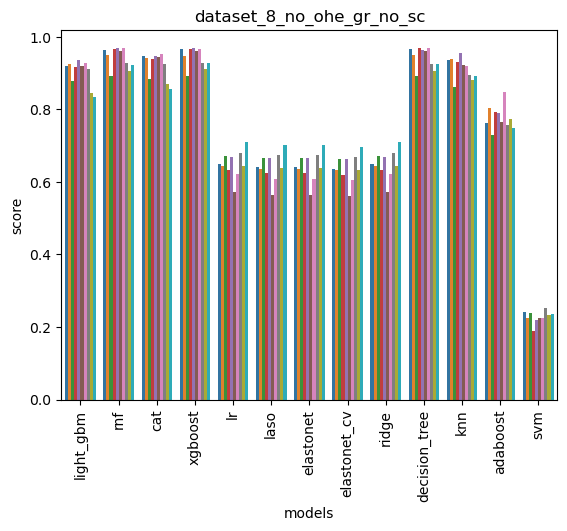

In [37]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_with_sc_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset_8_no_ohe_gr_no_sc')

# For train-test data

In [39]:
cv_scores ={}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.063354
0:	learn: 152.4290392	total: 3.74ms	remaining: 3.74s
1:	learn: 145.9767370	total: 6.57ms	remaining: 3.28s
2:	learn: 139.9585260	total: 9.51ms	remaining: 3.16s
3:	learn: 134.2691139	total: 12.3ms	remaining: 3.07s
4:	learn: 129.0819497	total: 15.2ms	remaining: 3.02s
5:	learn: 124.0074510	total: 18ms	remaining: 2.98s
6:	learn: 119.3626495	total: 20.9ms	remaining: 2.97s
7:	learn: 115.1171629	total: 23.7ms	remaining: 2.94s
8:	learn: 111.1906005	total: 26.3ms	remaining: 2.9s
9:	learn: 107.6813058	total: 28.8ms	remaining: 2.85s
10:	learn: 104.3313746	total: 31.6ms	remaining: 2.84s
11:	learn: 101.3913449	total: 34.3ms	remaining: 2.82s
12:	learn: 98.5291972	total: 36.9ms	remaining: 2.8s
13:	learn: 95.9118229	total: 39.7ms	remaining: 2.8s
14:	learn: 93.7212219	total: 42.4ms	remaining: 2.79s
15:	learn: 91.4236482	total: 45.2ms	remaining: 2.78s
16:	learn: 89.3032985	total: 48.7ms	remaining: 2.81s
17:	learn: 87.2788670	total: 51.5ms	remaining: 2.81s
18:	learn: 85.36503

158:	learn: 54.4502914	total: 394ms	remaining: 2.08s
159:	learn: 54.3686637	total: 397ms	remaining: 2.08s
160:	learn: 54.2919002	total: 399ms	remaining: 2.08s
161:	learn: 54.2336854	total: 401ms	remaining: 2.08s
162:	learn: 54.1678654	total: 404ms	remaining: 2.07s
163:	learn: 54.1090673	total: 407ms	remaining: 2.07s
164:	learn: 54.0466352	total: 410ms	remaining: 2.07s
165:	learn: 53.9927697	total: 413ms	remaining: 2.07s
166:	learn: 53.9549646	total: 415ms	remaining: 2.07s
167:	learn: 53.7562682	total: 417ms	remaining: 2.06s
168:	learn: 53.7244563	total: 419ms	remaining: 2.06s
169:	learn: 53.6832858	total: 424ms	remaining: 2.07s
170:	learn: 53.5917088	total: 427ms	remaining: 2.07s
171:	learn: 53.5450037	total: 430ms	remaining: 2.07s
172:	learn: 53.5176398	total: 432ms	remaining: 2.06s
173:	learn: 53.4844055	total: 434ms	remaining: 2.06s
174:	learn: 53.4653902	total: 437ms	remaining: 2.06s
175:	learn: 53.3808129	total: 440ms	remaining: 2.06s
176:	learn: 53.3623026	total: 442ms	remaining:

334:	learn: 47.3782165	total: 799ms	remaining: 1.58s
335:	learn: 47.3588804	total: 801ms	remaining: 1.58s
336:	learn: 47.3400323	total: 804ms	remaining: 1.58s
337:	learn: 47.3098521	total: 806ms	remaining: 1.58s
338:	learn: 47.3001023	total: 808ms	remaining: 1.58s
339:	learn: 47.2834204	total: 811ms	remaining: 1.57s
340:	learn: 47.2623582	total: 814ms	remaining: 1.57s
341:	learn: 47.2389026	total: 816ms	remaining: 1.57s
342:	learn: 47.2213356	total: 819ms	remaining: 1.57s
343:	learn: 47.2020982	total: 821ms	remaining: 1.57s
344:	learn: 47.1820506	total: 824ms	remaining: 1.56s
345:	learn: 47.1589905	total: 827ms	remaining: 1.56s
346:	learn: 47.1482294	total: 829ms	remaining: 1.56s
347:	learn: 47.1218265	total: 832ms	remaining: 1.56s
348:	learn: 47.1055827	total: 834ms	remaining: 1.55s
349:	learn: 47.0907902	total: 836ms	remaining: 1.55s
350:	learn: 47.0785307	total: 839ms	remaining: 1.55s
351:	learn: 47.0616367	total: 841ms	remaining: 1.55s
352:	learn: 47.0444009	total: 844ms	remaining:

507:	learn: 44.7854570	total: 1.19s	remaining: 1.16s
508:	learn: 44.7790653	total: 1.2s	remaining: 1.15s
509:	learn: 44.7732088	total: 1.2s	remaining: 1.15s
510:	learn: 44.7663129	total: 1.2s	remaining: 1.15s
511:	learn: 44.7579585	total: 1.2s	remaining: 1.15s
512:	learn: 44.7443239	total: 1.21s	remaining: 1.14s
513:	learn: 44.7223318	total: 1.21s	remaining: 1.14s
514:	learn: 44.7124575	total: 1.21s	remaining: 1.14s
515:	learn: 44.7073871	total: 1.21s	remaining: 1.14s
516:	learn: 44.6676056	total: 1.21s	remaining: 1.13s
517:	learn: 44.6585707	total: 1.22s	remaining: 1.13s
518:	learn: 44.6417494	total: 1.22s	remaining: 1.13s
519:	learn: 44.6339707	total: 1.22s	remaining: 1.13s
520:	learn: 44.6285184	total: 1.22s	remaining: 1.12s
521:	learn: 44.6160925	total: 1.23s	remaining: 1.12s
522:	learn: 44.6108598	total: 1.23s	remaining: 1.12s
523:	learn: 44.6013709	total: 1.23s	remaining: 1.12s
524:	learn: 44.5921405	total: 1.23s	remaining: 1.11s
525:	learn: 44.5842783	total: 1.23s	remaining: 1.1

679:	learn: 43.2490199	total: 1.59s	remaining: 747ms
680:	learn: 43.2400801	total: 1.59s	remaining: 745ms
681:	learn: 43.2292099	total: 1.59s	remaining: 743ms
682:	learn: 43.2254355	total: 1.59s	remaining: 740ms
683:	learn: 43.2170077	total: 1.6s	remaining: 738ms
684:	learn: 43.2125022	total: 1.6s	remaining: 736ms
685:	learn: 43.2081041	total: 1.6s	remaining: 733ms
686:	learn: 43.2026623	total: 1.6s	remaining: 731ms
687:	learn: 43.1822129	total: 1.61s	remaining: 729ms
688:	learn: 43.1778017	total: 1.61s	remaining: 726ms
689:	learn: 43.1699926	total: 1.61s	remaining: 724ms
690:	learn: 43.1656106	total: 1.61s	remaining: 722ms
691:	learn: 43.1619994	total: 1.61s	remaining: 719ms
692:	learn: 43.1518892	total: 1.62s	remaining: 717ms
693:	learn: 43.1437053	total: 1.62s	remaining: 714ms
694:	learn: 43.1382050	total: 1.62s	remaining: 712ms
695:	learn: 43.1308317	total: 1.62s	remaining: 710ms
696:	learn: 43.1188558	total: 1.63s	remaining: 707ms
697:	learn: 43.1159419	total: 1.63s	remaining: 705

858:	learn: 42.2686784	total: 1.99s	remaining: 327ms
859:	learn: 42.2666642	total: 2s	remaining: 325ms
860:	learn: 42.2629580	total: 2s	remaining: 323ms
861:	learn: 42.2596985	total: 2s	remaining: 320ms
862:	learn: 42.2561649	total: 2s	remaining: 318ms
863:	learn: 42.2523491	total: 2s	remaining: 316ms
864:	learn: 42.2482609	total: 2.01s	remaining: 313ms
865:	learn: 42.2440491	total: 2.01s	remaining: 311ms
866:	learn: 42.2342082	total: 2.01s	remaining: 309ms
867:	learn: 42.2307286	total: 2.01s	remaining: 306ms
868:	learn: 42.2292603	total: 2.02s	remaining: 304ms
869:	learn: 42.2271032	total: 2.02s	remaining: 302ms
870:	learn: 42.2229180	total: 2.02s	remaining: 299ms
871:	learn: 42.2164659	total: 2.02s	remaining: 297ms
872:	learn: 42.2135541	total: 2.02s	remaining: 295ms
873:	learn: 42.2079680	total: 2.03s	remaining: 292ms
874:	learn: 42.2010452	total: 2.03s	remaining: 290ms
875:	learn: 42.1908655	total: 2.03s	remaining: 288ms
876:	learn: 42.1871239	total: 2.03s	remaining: 285ms
877:	lea

88:	learn: 60.5125289	total: 205ms	remaining: 2.1s
89:	learn: 60.4699017	total: 207ms	remaining: 2.09s
90:	learn: 60.4256043	total: 209ms	remaining: 2.09s
91:	learn: 60.3713807	total: 211ms	remaining: 2.09s
92:	learn: 60.2844903	total: 214ms	remaining: 2.08s
93:	learn: 60.1908643	total: 216ms	remaining: 2.08s
94:	learn: 60.0914901	total: 219ms	remaining: 2.08s
95:	learn: 60.0264439	total: 221ms	remaining: 2.08s
96:	learn: 59.9740615	total: 223ms	remaining: 2.07s
97:	learn: 59.8542387	total: 225ms	remaining: 2.07s
98:	learn: 59.7091678	total: 227ms	remaining: 2.07s
99:	learn: 59.4457867	total: 229ms	remaining: 2.06s
100:	learn: 59.3750481	total: 231ms	remaining: 2.06s
101:	learn: 59.2826346	total: 234ms	remaining: 2.06s
102:	learn: 59.2440488	total: 236ms	remaining: 2.05s
103:	learn: 59.1106987	total: 238ms	remaining: 2.05s
104:	learn: 59.0593419	total: 240ms	remaining: 2.05s
105:	learn: 59.0074276	total: 242ms	remaining: 2.04s
106:	learn: 58.9800897	total: 244ms	remaining: 2.04s
107:	l

260:	learn: 50.6843329	total: 609ms	remaining: 1.72s
261:	learn: 50.6718512	total: 611ms	remaining: 1.72s
262:	learn: 50.6455383	total: 614ms	remaining: 1.72s
263:	learn: 50.6279184	total: 616ms	remaining: 1.72s
264:	learn: 50.5906628	total: 618ms	remaining: 1.71s
265:	learn: 50.5595607	total: 622ms	remaining: 1.72s
266:	learn: 50.5373682	total: 624ms	remaining: 1.71s
267:	learn: 50.5156689	total: 626ms	remaining: 1.71s
268:	learn: 50.4881610	total: 628ms	remaining: 1.71s
269:	learn: 50.4663192	total: 631ms	remaining: 1.7s
270:	learn: 50.4102279	total: 633ms	remaining: 1.7s
271:	learn: 50.3899925	total: 635ms	remaining: 1.7s
272:	learn: 50.3790435	total: 639ms	remaining: 1.7s
273:	learn: 50.3123588	total: 642ms	remaining: 1.7s
274:	learn: 50.2747355	total: 644ms	remaining: 1.7s
275:	learn: 50.2145090	total: 646ms	remaining: 1.69s
276:	learn: 50.1957873	total: 648ms	remaining: 1.69s
277:	learn: 50.1683518	total: 651ms	remaining: 1.69s
278:	learn: 50.1549155	total: 654ms	remaining: 1.69s

434:	learn: 47.0578475	total: 1s	remaining: 1.3s
435:	learn: 47.0496044	total: 1.01s	remaining: 1.3s
436:	learn: 47.0429922	total: 1.01s	remaining: 1.3s
437:	learn: 47.0303331	total: 1.01s	remaining: 1.3s
438:	learn: 47.0235421	total: 1.01s	remaining: 1.29s
439:	learn: 47.0185273	total: 1.02s	remaining: 1.29s
440:	learn: 46.9894298	total: 1.02s	remaining: 1.29s
441:	learn: 46.9758211	total: 1.02s	remaining: 1.29s
442:	learn: 46.9660709	total: 1.02s	remaining: 1.29s
443:	learn: 46.9574034	total: 1.03s	remaining: 1.28s
444:	learn: 46.9422556	total: 1.03s	remaining: 1.28s
445:	learn: 46.9194187	total: 1.03s	remaining: 1.28s
446:	learn: 46.9071473	total: 1.03s	remaining: 1.28s
447:	learn: 46.9027006	total: 1.03s	remaining: 1.27s
448:	learn: 46.8939103	total: 1.04s	remaining: 1.27s
449:	learn: 46.8900191	total: 1.04s	remaining: 1.27s
450:	learn: 46.8827955	total: 1.04s	remaining: 1.27s
451:	learn: 46.8690058	total: 1.04s	remaining: 1.27s
452:	learn: 46.8410012	total: 1.05s	remaining: 1.26s


604:	learn: 45.3993094	total: 1.4s	remaining: 914ms
605:	learn: 45.3886451	total: 1.4s	remaining: 912ms
606:	learn: 45.3833107	total: 1.41s	remaining: 910ms
607:	learn: 45.3783108	total: 1.41s	remaining: 908ms
608:	learn: 45.3651359	total: 1.41s	remaining: 906ms
609:	learn: 45.3507751	total: 1.41s	remaining: 903ms
610:	learn: 45.3479583	total: 1.42s	remaining: 901ms
611:	learn: 45.3410771	total: 1.42s	remaining: 899ms
612:	learn: 45.3333831	total: 1.42s	remaining: 896ms
613:	learn: 45.3273454	total: 1.42s	remaining: 894ms
614:	learn: 45.3239025	total: 1.42s	remaining: 892ms
615:	learn: 45.3197639	total: 1.43s	remaining: 890ms
616:	learn: 45.3159669	total: 1.43s	remaining: 887ms
617:	learn: 45.3104264	total: 1.43s	remaining: 885ms
618:	learn: 45.3072468	total: 1.43s	remaining: 883ms
619:	learn: 45.2993727	total: 1.44s	remaining: 880ms
620:	learn: 45.2916828	total: 1.44s	remaining: 878ms
621:	learn: 45.2839774	total: 1.44s	remaining: 875ms
622:	learn: 45.2792832	total: 1.44s	remaining: 8

777:	learn: 44.3864795	total: 1.8s	remaining: 514ms
778:	learn: 44.3833704	total: 1.8s	remaining: 512ms
779:	learn: 44.3790350	total: 1.81s	remaining: 510ms
780:	learn: 44.3735171	total: 1.81s	remaining: 508ms
781:	learn: 44.3691231	total: 1.81s	remaining: 505ms
782:	learn: 44.3656615	total: 1.81s	remaining: 503ms
783:	learn: 44.3630503	total: 1.82s	remaining: 501ms
784:	learn: 44.3571564	total: 1.82s	remaining: 498ms
785:	learn: 44.3517381	total: 1.82s	remaining: 496ms
786:	learn: 44.3500675	total: 1.82s	remaining: 494ms
787:	learn: 44.3474096	total: 1.82s	remaining: 491ms
788:	learn: 44.3440133	total: 1.83s	remaining: 489ms
789:	learn: 44.3404530	total: 1.83s	remaining: 487ms
790:	learn: 44.3345619	total: 1.83s	remaining: 484ms
791:	learn: 44.3301416	total: 1.83s	remaining: 482ms
792:	learn: 44.3254712	total: 1.84s	remaining: 480ms
793:	learn: 44.3236252	total: 1.84s	remaining: 477ms
794:	learn: 44.3196912	total: 1.84s	remaining: 475ms
795:	learn: 44.3163793	total: 1.84s	remaining: 4

952:	learn: 43.7525630	total: 2.2s	remaining: 108ms
953:	learn: 43.7495745	total: 2.2s	remaining: 106ms
954:	learn: 43.7480753	total: 2.2s	remaining: 104ms
955:	learn: 43.7466606	total: 2.2s	remaining: 101ms
956:	learn: 43.7449128	total: 2.21s	remaining: 99.1ms
957:	learn: 43.7424513	total: 2.21s	remaining: 96.8ms
958:	learn: 43.7407678	total: 2.21s	remaining: 94.5ms
959:	learn: 43.7385865	total: 2.21s	remaining: 92.2ms
960:	learn: 43.7270094	total: 2.21s	remaining: 89.9ms
961:	learn: 43.7226624	total: 2.22s	remaining: 87.6ms
962:	learn: 43.7204520	total: 2.22s	remaining: 85.3ms
963:	learn: 43.7186141	total: 2.22s	remaining: 83ms
964:	learn: 43.7156076	total: 2.22s	remaining: 80.7ms
965:	learn: 43.7051829	total: 2.23s	remaining: 78.4ms
966:	learn: 43.6957983	total: 2.23s	remaining: 76.1ms
967:	learn: 43.6912913	total: 2.23s	remaining: 73.8ms
968:	learn: 43.6892474	total: 2.23s	remaining: 71.5ms
969:	learn: 43.6856370	total: 2.24s	remaining: 69.2ms
970:	learn: 43.6827125	total: 2.24s	re

155:	learn: 56.0302228	total: 396ms	remaining: 2.14s
156:	learn: 55.9825965	total: 398ms	remaining: 2.14s
157:	learn: 55.9081683	total: 401ms	remaining: 2.13s
158:	learn: 55.8100259	total: 403ms	remaining: 2.13s
159:	learn: 55.7498248	total: 405ms	remaining: 2.13s
160:	learn: 55.6931739	total: 407ms	remaining: 2.12s
161:	learn: 55.6599951	total: 410ms	remaining: 2.12s
162:	learn: 55.6323391	total: 412ms	remaining: 2.11s
163:	learn: 55.5923379	total: 414ms	remaining: 2.11s
164:	learn: 55.5554903	total: 416ms	remaining: 2.1s
165:	learn: 55.5143677	total: 418ms	remaining: 2.1s
166:	learn: 55.4698826	total: 420ms	remaining: 2.1s
167:	learn: 55.4458894	total: 422ms	remaining: 2.09s
168:	learn: 55.4077888	total: 424ms	remaining: 2.08s
169:	learn: 55.3330495	total: 427ms	remaining: 2.08s
170:	learn: 55.2612338	total: 429ms	remaining: 2.08s
171:	learn: 55.1982202	total: 431ms	remaining: 2.08s
172:	learn: 55.1759229	total: 433ms	remaining: 2.07s
173:	learn: 55.1114320	total: 435ms	remaining: 2.

340:	learn: 48.9112751	total: 801ms	remaining: 1.55s
341:	learn: 48.8921773	total: 804ms	remaining: 1.55s
342:	learn: 48.8671289	total: 806ms	remaining: 1.54s
343:	learn: 48.8568927	total: 808ms	remaining: 1.54s
344:	learn: 48.8447034	total: 810ms	remaining: 1.54s
345:	learn: 48.8356439	total: 813ms	remaining: 1.53s
346:	learn: 48.8157988	total: 815ms	remaining: 1.53s
347:	learn: 48.7908015	total: 817ms	remaining: 1.53s
348:	learn: 48.7817177	total: 819ms	remaining: 1.53s
349:	learn: 48.7613093	total: 821ms	remaining: 1.52s
350:	learn: 48.7241551	total: 824ms	remaining: 1.52s
351:	learn: 48.7014158	total: 826ms	remaining: 1.52s
352:	learn: 48.6855825	total: 828ms	remaining: 1.52s
353:	learn: 48.6682087	total: 830ms	remaining: 1.51s
354:	learn: 48.6557327	total: 833ms	remaining: 1.51s
355:	learn: 48.6393462	total: 835ms	remaining: 1.51s
356:	learn: 48.6274085	total: 837ms	remaining: 1.51s
357:	learn: 48.6088956	total: 839ms	remaining: 1.5s
358:	learn: 48.5911591	total: 841ms	remaining: 

520:	learn: 46.1220546	total: 1.2s	remaining: 1.1s
521:	learn: 46.1124470	total: 1.2s	remaining: 1.1s
522:	learn: 46.1095697	total: 1.2s	remaining: 1.1s
523:	learn: 46.0968512	total: 1.21s	remaining: 1.09s
524:	learn: 46.0885536	total: 1.21s	remaining: 1.09s
525:	learn: 46.0825696	total: 1.21s	remaining: 1.09s
526:	learn: 46.0736879	total: 1.21s	remaining: 1.09s
527:	learn: 46.0643460	total: 1.22s	remaining: 1.09s
528:	learn: 46.0608891	total: 1.22s	remaining: 1.08s
529:	learn: 46.0486342	total: 1.22s	remaining: 1.08s
530:	learn: 46.0385747	total: 1.22s	remaining: 1.08s
531:	learn: 46.0334514	total: 1.22s	remaining: 1.08s
532:	learn: 46.0246297	total: 1.23s	remaining: 1.07s
533:	learn: 46.0170755	total: 1.23s	remaining: 1.07s
534:	learn: 46.0052881	total: 1.23s	remaining: 1.07s
535:	learn: 45.9966944	total: 1.23s	remaining: 1.07s
536:	learn: 45.9908345	total: 1.24s	remaining: 1.06s
537:	learn: 45.9876202	total: 1.24s	remaining: 1.06s
538:	learn: 45.9583626	total: 1.24s	remaining: 1.06s

702:	learn: 44.8166973	total: 1.6s	remaining: 678ms
703:	learn: 44.8093040	total: 1.61s	remaining: 676ms
704:	learn: 44.8041572	total: 1.61s	remaining: 673ms
705:	learn: 44.7995371	total: 1.61s	remaining: 671ms
706:	learn: 44.7924211	total: 1.61s	remaining: 669ms
707:	learn: 44.7848760	total: 1.62s	remaining: 667ms
708:	learn: 44.7730011	total: 1.62s	remaining: 665ms
709:	learn: 44.7707222	total: 1.62s	remaining: 662ms
710:	learn: 44.7682917	total: 1.62s	remaining: 660ms
711:	learn: 44.7615588	total: 1.63s	remaining: 658ms
712:	learn: 44.7586016	total: 1.63s	remaining: 655ms
713:	learn: 44.7515871	total: 1.63s	remaining: 653ms
714:	learn: 44.7413504	total: 1.63s	remaining: 651ms
715:	learn: 44.7384936	total: 1.63s	remaining: 648ms
716:	learn: 44.7337901	total: 1.64s	remaining: 646ms
717:	learn: 44.7314617	total: 1.64s	remaining: 644ms
718:	learn: 44.7115307	total: 1.64s	remaining: 641ms
719:	learn: 44.7072383	total: 1.64s	remaining: 639ms
720:	learn: 44.7037598	total: 1.65s	remaining: 

882:	learn: 43.9743139	total: 2.01s	remaining: 266ms
883:	learn: 43.9733443	total: 2.01s	remaining: 264ms
884:	learn: 43.9704492	total: 2.01s	remaining: 261ms
885:	learn: 43.9652141	total: 2.01s	remaining: 259ms
886:	learn: 43.9622684	total: 2.02s	remaining: 257ms
887:	learn: 43.9578257	total: 2.02s	remaining: 255ms
888:	learn: 43.9492811	total: 2.02s	remaining: 252ms
889:	learn: 43.9462631	total: 2.02s	remaining: 250ms
890:	learn: 43.9429283	total: 2.02s	remaining: 248ms
891:	learn: 43.9377785	total: 2.03s	remaining: 245ms
892:	learn: 43.9368894	total: 2.03s	remaining: 243ms
893:	learn: 43.9340572	total: 2.03s	remaining: 241ms
894:	learn: 43.9286508	total: 2.03s	remaining: 239ms
895:	learn: 43.9235759	total: 2.04s	remaining: 236ms
896:	learn: 43.9196147	total: 2.04s	remaining: 234ms
897:	learn: 43.9170216	total: 2.04s	remaining: 232ms
898:	learn: 43.9154815	total: 2.04s	remaining: 229ms
899:	learn: 43.9128452	total: 2.04s	remaining: 227ms
900:	learn: 43.8957461	total: 2.05s	remaining:

72:	learn: 62.6076967	total: 198ms	remaining: 2.51s
73:	learn: 62.4960519	total: 200ms	remaining: 2.51s
74:	learn: 62.3870320	total: 203ms	remaining: 2.5s
75:	learn: 62.3041103	total: 205ms	remaining: 2.49s
76:	learn: 62.2263237	total: 207ms	remaining: 2.48s
77:	learn: 62.1482873	total: 210ms	remaining: 2.48s
78:	learn: 62.0726809	total: 212ms	remaining: 2.48s
79:	learn: 62.0153441	total: 215ms	remaining: 2.47s
80:	learn: 61.9574829	total: 217ms	remaining: 2.46s
81:	learn: 61.8520738	total: 219ms	remaining: 2.45s
82:	learn: 61.7283193	total: 221ms	remaining: 2.44s
83:	learn: 61.6548153	total: 224ms	remaining: 2.44s
84:	learn: 61.5379534	total: 226ms	remaining: 2.43s
85:	learn: 61.4732249	total: 228ms	remaining: 2.43s
86:	learn: 61.4339968	total: 230ms	remaining: 2.42s
87:	learn: 61.3439334	total: 233ms	remaining: 2.41s
88:	learn: 61.2954350	total: 235ms	remaining: 2.4s
89:	learn: 61.2199720	total: 237ms	remaining: 2.39s
90:	learn: 61.1311827	total: 239ms	remaining: 2.39s
91:	learn: 61.

256:	learn: 51.7295245	total: 605ms	remaining: 1.75s
257:	learn: 51.7086756	total: 608ms	remaining: 1.75s
258:	learn: 51.6785696	total: 610ms	remaining: 1.74s
259:	learn: 51.6379444	total: 612ms	remaining: 1.74s
260:	learn: 51.6153466	total: 615ms	remaining: 1.74s
261:	learn: 51.5693051	total: 617ms	remaining: 1.74s
262:	learn: 51.5451454	total: 620ms	remaining: 1.74s
263:	learn: 51.5186837	total: 622ms	remaining: 1.73s
264:	learn: 51.4925671	total: 624ms	remaining: 1.73s
265:	learn: 51.4559661	total: 626ms	remaining: 1.73s
266:	learn: 51.4232384	total: 628ms	remaining: 1.73s
267:	learn: 51.4135624	total: 631ms	remaining: 1.72s
268:	learn: 51.3794402	total: 633ms	remaining: 1.72s
269:	learn: 51.3604882	total: 635ms	remaining: 1.72s
270:	learn: 51.3170142	total: 637ms	remaining: 1.71s
271:	learn: 51.2920121	total: 640ms	remaining: 1.71s
272:	learn: 51.2736289	total: 642ms	remaining: 1.71s
273:	learn: 51.2579074	total: 644ms	remaining: 1.71s
274:	learn: 51.2309941	total: 646ms	remaining:

435:	learn: 47.8687817	total: 1.02s	remaining: 1.32s
436:	learn: 47.8557801	total: 1.02s	remaining: 1.31s
437:	learn: 47.8349332	total: 1.02s	remaining: 1.31s
438:	learn: 47.8086099	total: 1.02s	remaining: 1.31s
439:	learn: 47.7999161	total: 1.03s	remaining: 1.31s
440:	learn: 47.7827953	total: 1.03s	remaining: 1.3s
441:	learn: 47.7766056	total: 1.03s	remaining: 1.3s
442:	learn: 47.7616221	total: 1.03s	remaining: 1.3s
443:	learn: 47.7484902	total: 1.03s	remaining: 1.3s
444:	learn: 47.7345119	total: 1.04s	remaining: 1.29s
445:	learn: 47.7265340	total: 1.04s	remaining: 1.29s
446:	learn: 47.7108537	total: 1.04s	remaining: 1.29s
447:	learn: 47.6994297	total: 1.04s	remaining: 1.29s
448:	learn: 47.6892696	total: 1.05s	remaining: 1.28s
449:	learn: 47.6823757	total: 1.05s	remaining: 1.28s
450:	learn: 47.6692079	total: 1.05s	remaining: 1.28s
451:	learn: 47.6609340	total: 1.05s	remaining: 1.28s
452:	learn: 47.6467730	total: 1.05s	remaining: 1.27s
453:	learn: 47.6313371	total: 1.06s	remaining: 1.2

617:	learn: 46.0765857	total: 1.42s	remaining: 880ms
618:	learn: 46.0712392	total: 1.43s	remaining: 877ms
619:	learn: 46.0602310	total: 1.43s	remaining: 875ms
620:	learn: 46.0547182	total: 1.43s	remaining: 873ms
621:	learn: 46.0527204	total: 1.43s	remaining: 871ms
622:	learn: 46.0441788	total: 1.43s	remaining: 868ms
623:	learn: 46.0368119	total: 1.44s	remaining: 866ms
624:	learn: 46.0327173	total: 1.44s	remaining: 864ms
625:	learn: 46.0296665	total: 1.44s	remaining: 861ms
626:	learn: 46.0238843	total: 1.44s	remaining: 859ms
627:	learn: 46.0190494	total: 1.45s	remaining: 857ms
628:	learn: 46.0124637	total: 1.45s	remaining: 854ms
629:	learn: 46.0033122	total: 1.45s	remaining: 852ms
630:	learn: 45.9960918	total: 1.45s	remaining: 850ms
631:	learn: 45.9932830	total: 1.45s	remaining: 847ms
632:	learn: 45.9875660	total: 1.46s	remaining: 845ms
633:	learn: 45.9813748	total: 1.46s	remaining: 843ms
634:	learn: 45.9714281	total: 1.46s	remaining: 840ms
635:	learn: 45.9682472	total: 1.46s	remaining:

796:	learn: 45.0830923	total: 1.82s	remaining: 465ms
797:	learn: 45.0775142	total: 1.83s	remaining: 463ms
798:	learn: 45.0762427	total: 1.83s	remaining: 460ms
799:	learn: 45.0723787	total: 1.83s	remaining: 458ms
800:	learn: 45.0688132	total: 1.83s	remaining: 456ms
801:	learn: 45.0662239	total: 1.84s	remaining: 454ms
802:	learn: 45.0594621	total: 1.84s	remaining: 451ms
803:	learn: 45.0574015	total: 1.84s	remaining: 449ms
804:	learn: 45.0529985	total: 1.84s	remaining: 447ms
805:	learn: 45.0479284	total: 1.85s	remaining: 444ms
806:	learn: 45.0448903	total: 1.85s	remaining: 442ms
807:	learn: 45.0433688	total: 1.85s	remaining: 440ms
808:	learn: 45.0380364	total: 1.85s	remaining: 437ms
809:	learn: 45.0355681	total: 1.85s	remaining: 435ms
810:	learn: 45.0318557	total: 1.86s	remaining: 433ms
811:	learn: 45.0265440	total: 1.86s	remaining: 431ms
812:	learn: 45.0229515	total: 1.86s	remaining: 428ms
813:	learn: 45.0197495	total: 1.86s	remaining: 426ms
814:	learn: 45.0134434	total: 1.87s	remaining:

974:	learn: 44.4478857	total: 2.23s	remaining: 57.1ms
975:	learn: 44.4447878	total: 2.23s	remaining: 54.8ms
976:	learn: 44.4417780	total: 2.23s	remaining: 52.5ms
977:	learn: 44.4402243	total: 2.23s	remaining: 50.2ms
978:	learn: 44.4374593	total: 2.23s	remaining: 47.9ms
979:	learn: 44.4345112	total: 2.24s	remaining: 45.7ms
980:	learn: 44.4330956	total: 2.24s	remaining: 43.4ms
981:	learn: 44.4308550	total: 2.24s	remaining: 41.1ms
982:	learn: 44.4257139	total: 2.24s	remaining: 38.8ms
983:	learn: 44.4223344	total: 2.25s	remaining: 36.5ms
984:	learn: 44.4202031	total: 2.25s	remaining: 34.2ms
985:	learn: 44.4162971	total: 2.25s	remaining: 32ms
986:	learn: 44.4148373	total: 2.25s	remaining: 29.7ms
987:	learn: 44.4129763	total: 2.25s	remaining: 27.4ms
988:	learn: 44.4087031	total: 2.26s	remaining: 25.1ms
989:	learn: 44.4075917	total: 2.26s	remaining: 22.8ms
990:	learn: 44.4058156	total: 2.26s	remaining: 20.6ms
991:	learn: 44.4039442	total: 2.27s	remaining: 18.3ms
992:	learn: 44.4016675	total: 

167:	learn: 56.0486797	total: 396ms	remaining: 1.96s
168:	learn: 56.0092151	total: 399ms	remaining: 1.96s
169:	learn: 55.9587676	total: 401ms	remaining: 1.96s
170:	learn: 55.9145613	total: 403ms	remaining: 1.96s
171:	learn: 55.8935353	total: 406ms	remaining: 1.95s
172:	learn: 55.8203868	total: 408ms	remaining: 1.95s
173:	learn: 55.7892757	total: 411ms	remaining: 1.95s
174:	learn: 55.7651233	total: 413ms	remaining: 1.95s
175:	learn: 55.7351791	total: 416ms	remaining: 1.95s
176:	learn: 55.6994083	total: 419ms	remaining: 1.95s
177:	learn: 55.6670103	total: 421ms	remaining: 1.94s
178:	learn: 55.6180956	total: 423ms	remaining: 1.94s
179:	learn: 55.4283094	total: 426ms	remaining: 1.94s
180:	learn: 55.3961706	total: 428ms	remaining: 1.94s
181:	learn: 55.2065587	total: 430ms	remaining: 1.93s
182:	learn: 55.1679344	total: 432ms	remaining: 1.93s
183:	learn: 55.1013812	total: 434ms	remaining: 1.93s
184:	learn: 55.0535794	total: 436ms	remaining: 1.92s
185:	learn: 55.0057037	total: 439ms	remaining:

350:	learn: 49.4265483	total: 807ms	remaining: 1.49s
351:	learn: 49.4120552	total: 809ms	remaining: 1.49s
352:	learn: 49.3846541	total: 812ms	remaining: 1.49s
353:	learn: 49.3657687	total: 814ms	remaining: 1.49s
354:	learn: 49.3544668	total: 816ms	remaining: 1.48s
355:	learn: 49.3218375	total: 818ms	remaining: 1.48s
356:	learn: 49.3155990	total: 821ms	remaining: 1.48s
357:	learn: 49.2997937	total: 823ms	remaining: 1.48s
358:	learn: 49.2739720	total: 825ms	remaining: 1.47s
359:	learn: 49.2571719	total: 828ms	remaining: 1.47s
360:	learn: 49.2172434	total: 830ms	remaining: 1.47s
361:	learn: 49.2045345	total: 832ms	remaining: 1.47s
362:	learn: 49.1806168	total: 834ms	remaining: 1.46s
363:	learn: 49.1618066	total: 837ms	remaining: 1.46s
364:	learn: 49.1457615	total: 839ms	remaining: 1.46s
365:	learn: 49.1082588	total: 841ms	remaining: 1.46s
366:	learn: 49.0997519	total: 843ms	remaining: 1.45s
367:	learn: 49.0866100	total: 846ms	remaining: 1.45s
368:	learn: 49.0720252	total: 848ms	remaining:

530:	learn: 47.2080957	total: 1.21s	remaining: 1.07s
531:	learn: 47.2022108	total: 1.21s	remaining: 1.06s
532:	learn: 47.1959281	total: 1.21s	remaining: 1.06s
533:	learn: 47.1700268	total: 1.22s	remaining: 1.06s
534:	learn: 47.1612763	total: 1.22s	remaining: 1.06s
535:	learn: 47.1544598	total: 1.22s	remaining: 1.06s
536:	learn: 47.1504034	total: 1.22s	remaining: 1.05s
537:	learn: 47.1419480	total: 1.23s	remaining: 1.05s
538:	learn: 47.1257734	total: 1.23s	remaining: 1.05s
539:	learn: 47.1234058	total: 1.23s	remaining: 1.05s
540:	learn: 47.1146466	total: 1.23s	remaining: 1.04s
541:	learn: 47.1055432	total: 1.23s	remaining: 1.04s
542:	learn: 47.0964712	total: 1.24s	remaining: 1.04s
543:	learn: 47.0873087	total: 1.24s	remaining: 1.04s
544:	learn: 47.0780954	total: 1.24s	remaining: 1.04s
545:	learn: 47.0709392	total: 1.24s	remaining: 1.03s
546:	learn: 47.0604454	total: 1.25s	remaining: 1.03s
547:	learn: 47.0569472	total: 1.25s	remaining: 1.03s
548:	learn: 47.0401879	total: 1.25s	remaining:

713:	learn: 45.8379578	total: 1.62s	remaining: 650ms
714:	learn: 45.8358947	total: 1.62s	remaining: 647ms
715:	learn: 45.8331165	total: 1.63s	remaining: 645ms
716:	learn: 45.8295093	total: 1.63s	remaining: 643ms
717:	learn: 45.8252833	total: 1.63s	remaining: 641ms
718:	learn: 45.8141628	total: 1.63s	remaining: 638ms
719:	learn: 45.8114600	total: 1.64s	remaining: 636ms
720:	learn: 45.8097883	total: 1.64s	remaining: 634ms
721:	learn: 45.8055606	total: 1.64s	remaining: 632ms
722:	learn: 45.8022613	total: 1.64s	remaining: 629ms
723:	learn: 45.7989167	total: 1.64s	remaining: 627ms
724:	learn: 45.7942174	total: 1.65s	remaining: 625ms
725:	learn: 45.7861475	total: 1.65s	remaining: 622ms
726:	learn: 45.7822784	total: 1.65s	remaining: 620ms
727:	learn: 45.7790017	total: 1.65s	remaining: 618ms
728:	learn: 45.7717057	total: 1.66s	remaining: 616ms
729:	learn: 45.7692806	total: 1.66s	remaining: 613ms
730:	learn: 45.7651989	total: 1.66s	remaining: 611ms
731:	learn: 45.7589685	total: 1.66s	remaining:

894:	learn: 45.0651559	total: 2.03s	remaining: 238ms
895:	learn: 45.0628023	total: 2.03s	remaining: 236ms
896:	learn: 45.0591079	total: 2.03s	remaining: 233ms
897:	learn: 45.0582271	total: 2.03s	remaining: 231ms
898:	learn: 45.0563134	total: 2.04s	remaining: 229ms
899:	learn: 45.0523780	total: 2.04s	remaining: 227ms
900:	learn: 45.0511393	total: 2.04s	remaining: 224ms
901:	learn: 45.0480921	total: 2.04s	remaining: 222ms
902:	learn: 45.0456143	total: 2.04s	remaining: 220ms
903:	learn: 45.0388455	total: 2.05s	remaining: 218ms
904:	learn: 45.0351867	total: 2.05s	remaining: 215ms
905:	learn: 45.0303258	total: 2.05s	remaining: 213ms
906:	learn: 45.0285134	total: 2.06s	remaining: 211ms
907:	learn: 45.0271616	total: 2.06s	remaining: 208ms
908:	learn: 45.0264097	total: 2.06s	remaining: 206ms
909:	learn: 45.0247165	total: 2.06s	remaining: 204ms
910:	learn: 45.0238038	total: 2.06s	remaining: 202ms
911:	learn: 45.0181009	total: 2.07s	remaining: 199ms
912:	learn: 45.0157133	total: 2.07s	remaining:

70:	learn: 63.4592660	total: 230ms	remaining: 3s
71:	learn: 63.3707796	total: 232ms	remaining: 2.99s
72:	learn: 63.2632829	total: 235ms	remaining: 2.98s
73:	learn: 63.1429301	total: 237ms	remaining: 2.97s
74:	learn: 63.0598237	total: 240ms	remaining: 2.96s
75:	learn: 62.9381493	total: 242ms	remaining: 2.94s
76:	learn: 62.8608617	total: 245ms	remaining: 2.93s
77:	learn: 62.7368415	total: 247ms	remaining: 2.92s
78:	learn: 62.6196687	total: 249ms	remaining: 2.9s
79:	learn: 62.4797627	total: 251ms	remaining: 2.89s
80:	learn: 62.4011343	total: 253ms	remaining: 2.88s
81:	learn: 62.3576084	total: 256ms	remaining: 2.86s
82:	learn: 62.2605911	total: 258ms	remaining: 2.85s
83:	learn: 62.2088339	total: 260ms	remaining: 2.84s
84:	learn: 62.1110804	total: 263ms	remaining: 2.83s
85:	learn: 62.0457339	total: 265ms	remaining: 2.82s
86:	learn: 61.9841358	total: 267ms	remaining: 2.8s
87:	learn: 61.8995660	total: 270ms	remaining: 2.79s
88:	learn: 61.8221127	total: 272ms	remaining: 2.79s
89:	learn: 61.759

249:	learn: 51.6933976	total: 633ms	remaining: 1.9s
250:	learn: 51.6646850	total: 635ms	remaining: 1.9s
251:	learn: 51.6256689	total: 638ms	remaining: 1.89s
252:	learn: 51.6000334	total: 640ms	remaining: 1.89s
253:	learn: 51.5638289	total: 642ms	remaining: 1.89s
254:	learn: 51.5434637	total: 644ms	remaining: 1.88s
255:	learn: 51.4914782	total: 647ms	remaining: 1.88s
256:	learn: 51.4583929	total: 649ms	remaining: 1.88s
257:	learn: 51.4403310	total: 651ms	remaining: 1.87s
258:	learn: 51.3999531	total: 653ms	remaining: 1.87s
259:	learn: 51.3566812	total: 656ms	remaining: 1.86s
260:	learn: 51.3339098	total: 658ms	remaining: 1.86s
261:	learn: 51.2985523	total: 660ms	remaining: 1.86s
262:	learn: 51.2861666	total: 662ms	remaining: 1.85s
263:	learn: 51.2597810	total: 664ms	remaining: 1.85s
264:	learn: 51.2335515	total: 667ms	remaining: 1.85s
265:	learn: 51.2133748	total: 669ms	remaining: 1.84s
266:	learn: 51.2011745	total: 671ms	remaining: 1.84s
267:	learn: 51.1814587	total: 673ms	remaining: 1

426:	learn: 47.8081293	total: 1.04s	remaining: 1.39s
427:	learn: 47.8034159	total: 1.04s	remaining: 1.39s
428:	learn: 47.7403458	total: 1.04s	remaining: 1.39s
429:	learn: 47.7199366	total: 1.04s	remaining: 1.38s
430:	learn: 47.7155400	total: 1.05s	remaining: 1.38s
431:	learn: 47.7046173	total: 1.05s	remaining: 1.38s
432:	learn: 47.6841711	total: 1.05s	remaining: 1.38s
433:	learn: 47.6691866	total: 1.05s	remaining: 1.37s
434:	learn: 47.6563224	total: 1.05s	remaining: 1.37s
435:	learn: 47.6435076	total: 1.06s	remaining: 1.37s
436:	learn: 47.6311912	total: 1.06s	remaining: 1.36s
437:	learn: 47.6085044	total: 1.06s	remaining: 1.36s
438:	learn: 47.5931440	total: 1.06s	remaining: 1.36s
439:	learn: 47.5787758	total: 1.07s	remaining: 1.36s
440:	learn: 47.5214465	total: 1.07s	remaining: 1.35s
441:	learn: 47.5101722	total: 1.07s	remaining: 1.35s
442:	learn: 47.5000866	total: 1.07s	remaining: 1.35s
443:	learn: 47.4887664	total: 1.07s	remaining: 1.35s
444:	learn: 47.4371938	total: 1.08s	remaining:

607:	learn: 45.7359778	total: 1.44s	remaining: 931ms
608:	learn: 45.7277435	total: 1.45s	remaining: 928ms
609:	learn: 45.7224017	total: 1.45s	remaining: 926ms
610:	learn: 45.7151487	total: 1.45s	remaining: 923ms
611:	learn: 45.7125453	total: 1.45s	remaining: 921ms
612:	learn: 45.7063462	total: 1.46s	remaining: 919ms
613:	learn: 45.7007867	total: 1.46s	remaining: 916ms
614:	learn: 45.6892963	total: 1.46s	remaining: 914ms
615:	learn: 45.6819238	total: 1.46s	remaining: 911ms
616:	learn: 45.6783231	total: 1.46s	remaining: 909ms
617:	learn: 45.6689545	total: 1.47s	remaining: 906ms
618:	learn: 45.6640912	total: 1.47s	remaining: 904ms
619:	learn: 45.6577865	total: 1.47s	remaining: 902ms
620:	learn: 45.6519933	total: 1.47s	remaining: 899ms
621:	learn: 45.6480277	total: 1.48s	remaining: 897ms
622:	learn: 45.6445411	total: 1.48s	remaining: 894ms
623:	learn: 45.6277428	total: 1.48s	remaining: 892ms
624:	learn: 45.6255988	total: 1.48s	remaining: 889ms
625:	learn: 45.6201301	total: 1.48s	remaining:

783:	learn: 44.6380566	total: 1.84s	remaining: 508ms
784:	learn: 44.6343590	total: 1.84s	remaining: 505ms
785:	learn: 44.6325097	total: 1.85s	remaining: 503ms
786:	learn: 44.6220404	total: 1.85s	remaining: 501ms
787:	learn: 44.6207223	total: 1.85s	remaining: 498ms
788:	learn: 44.6154220	total: 1.85s	remaining: 496ms
789:	learn: 44.6130638	total: 1.86s	remaining: 494ms
790:	learn: 44.6106773	total: 1.86s	remaining: 491ms
791:	learn: 44.6076410	total: 1.86s	remaining: 489ms
792:	learn: 44.6038976	total: 1.86s	remaining: 487ms
793:	learn: 44.5993454	total: 1.87s	remaining: 484ms
794:	learn: 44.5957247	total: 1.87s	remaining: 482ms
795:	learn: 44.5889802	total: 1.87s	remaining: 479ms
796:	learn: 44.5702422	total: 1.87s	remaining: 477ms
797:	learn: 44.5653636	total: 1.88s	remaining: 475ms
798:	learn: 44.5630564	total: 1.88s	remaining: 472ms
799:	learn: 44.5571626	total: 1.88s	remaining: 470ms
800:	learn: 44.5545916	total: 1.88s	remaining: 468ms
801:	learn: 44.5487495	total: 1.89s	remaining:

957:	learn: 43.8970513	total: 2.25s	remaining: 98.4ms
958:	learn: 43.8916010	total: 2.25s	remaining: 96.1ms
959:	learn: 43.8880466	total: 2.25s	remaining: 93.8ms
960:	learn: 43.8863491	total: 2.25s	remaining: 91.5ms
961:	learn: 43.8824369	total: 2.26s	remaining: 89.1ms
962:	learn: 43.8807037	total: 2.26s	remaining: 86.8ms
963:	learn: 43.8784551	total: 2.26s	remaining: 84.4ms
964:	learn: 43.8769489	total: 2.26s	remaining: 82.1ms
965:	learn: 43.8734828	total: 2.27s	remaining: 79.7ms
966:	learn: 43.8714273	total: 2.27s	remaining: 77.4ms
967:	learn: 43.8676262	total: 2.27s	remaining: 75ms
968:	learn: 43.8651949	total: 2.27s	remaining: 72.7ms
969:	learn: 43.8636098	total: 2.27s	remaining: 70.4ms
970:	learn: 43.8603768	total: 2.28s	remaining: 68ms
971:	learn: 43.8576434	total: 2.28s	remaining: 65.7ms
972:	learn: 43.8542657	total: 2.28s	remaining: 63.3ms
973:	learn: 43.8534943	total: 2.28s	remaining: 61ms
974:	learn: 43.8508912	total: 2.29s	remaining: 58.6ms
975:	learn: 43.8469370	total: 2.29

170:	learn: 54.5697451	total: 395ms	remaining: 1.91s
171:	learn: 54.4760208	total: 397ms	remaining: 1.91s
172:	learn: 54.4292126	total: 399ms	remaining: 1.91s
173:	learn: 54.3765766	total: 402ms	remaining: 1.91s
174:	learn: 54.3604374	total: 404ms	remaining: 1.9s
175:	learn: 54.3101403	total: 407ms	remaining: 1.9s
176:	learn: 54.2864739	total: 410ms	remaining: 1.91s
177:	learn: 54.2535277	total: 412ms	remaining: 1.9s
178:	learn: 54.1143729	total: 414ms	remaining: 1.9s
179:	learn: 54.0549172	total: 417ms	remaining: 1.9s
180:	learn: 53.9206835	total: 419ms	remaining: 1.9s
181:	learn: 53.8888964	total: 421ms	remaining: 1.89s
182:	learn: 53.8635092	total: 423ms	remaining: 1.89s
183:	learn: 53.8220959	total: 426ms	remaining: 1.89s
184:	learn: 53.7958033	total: 428ms	remaining: 1.89s
185:	learn: 53.7733059	total: 431ms	remaining: 1.88s
186:	learn: 53.7241512	total: 434ms	remaining: 1.89s
187:	learn: 53.7084307	total: 436ms	remaining: 1.88s
188:	learn: 53.6455161	total: 439ms	remaining: 1.88s

338:	learn: 48.8815367	total: 787ms	remaining: 1.53s
339:	learn: 48.8636590	total: 789ms	remaining: 1.53s
340:	learn: 48.8538604	total: 792ms	remaining: 1.53s
341:	learn: 48.8330439	total: 794ms	remaining: 1.53s
342:	learn: 48.7961118	total: 797ms	remaining: 1.52s
343:	learn: 48.7717838	total: 799ms	remaining: 1.52s
344:	learn: 48.7481533	total: 801ms	remaining: 1.52s
345:	learn: 48.7433020	total: 803ms	remaining: 1.52s
346:	learn: 48.7254576	total: 805ms	remaining: 1.51s
347:	learn: 48.7085530	total: 808ms	remaining: 1.51s
348:	learn: 48.7015565	total: 810ms	remaining: 1.51s
349:	learn: 48.6684022	total: 812ms	remaining: 1.51s
350:	learn: 48.5993150	total: 814ms	remaining: 1.5s
351:	learn: 48.5939214	total: 817ms	remaining: 1.5s
352:	learn: 48.5318248	total: 819ms	remaining: 1.5s
353:	learn: 48.5161181	total: 821ms	remaining: 1.5s
354:	learn: 48.5068390	total: 823ms	remaining: 1.5s
355:	learn: 48.4881027	total: 825ms	remaining: 1.49s
356:	learn: 48.4600920	total: 828ms	remaining: 1.49

510:	learn: 46.1127950	total: 1.18s	remaining: 1.13s
511:	learn: 46.1046988	total: 1.19s	remaining: 1.13s
512:	learn: 46.0957478	total: 1.19s	remaining: 1.13s
513:	learn: 46.0853200	total: 1.19s	remaining: 1.13s
514:	learn: 46.0801127	total: 1.19s	remaining: 1.12s
515:	learn: 46.0742771	total: 1.2s	remaining: 1.12s
516:	learn: 46.0712851	total: 1.2s	remaining: 1.12s
517:	learn: 46.0608512	total: 1.2s	remaining: 1.12s
518:	learn: 46.0503615	total: 1.2s	remaining: 1.11s
519:	learn: 46.0391611	total: 1.21s	remaining: 1.11s
520:	learn: 46.0335350	total: 1.21s	remaining: 1.11s
521:	learn: 46.0253817	total: 1.21s	remaining: 1.11s
522:	learn: 46.0231775	total: 1.21s	remaining: 1.11s
523:	learn: 46.0103425	total: 1.22s	remaining: 1.1s
524:	learn: 45.9993312	total: 1.22s	remaining: 1.1s
525:	learn: 45.9904168	total: 1.22s	remaining: 1.1s
526:	learn: 45.9664371	total: 1.22s	remaining: 1.1s
527:	learn: 45.9641533	total: 1.22s	remaining: 1.09s
528:	learn: 45.9502680	total: 1.23s	remaining: 1.09s
5

682:	learn: 44.6623745	total: 1.58s	remaining: 735ms
683:	learn: 44.6537620	total: 1.58s	remaining: 732ms
684:	learn: 44.6491688	total: 1.59s	remaining: 730ms
685:	learn: 44.6383807	total: 1.59s	remaining: 728ms
686:	learn: 44.6320618	total: 1.59s	remaining: 726ms
687:	learn: 44.6232020	total: 1.59s	remaining: 723ms
688:	learn: 44.6115791	total: 1.6s	remaining: 721ms
689:	learn: 44.6071240	total: 1.6s	remaining: 719ms
690:	learn: 44.5991753	total: 1.6s	remaining: 716ms
691:	learn: 44.5886759	total: 1.6s	remaining: 714ms
692:	learn: 44.5863338	total: 1.61s	remaining: 712ms
693:	learn: 44.5778071	total: 1.61s	remaining: 709ms
694:	learn: 44.5731604	total: 1.61s	remaining: 707ms
695:	learn: 44.5692503	total: 1.61s	remaining: 705ms
696:	learn: 44.5621284	total: 1.61s	remaining: 702ms
697:	learn: 44.5559724	total: 1.62s	remaining: 700ms
698:	learn: 44.5502884	total: 1.62s	remaining: 698ms
699:	learn: 44.5412538	total: 1.62s	remaining: 695ms
700:	learn: 44.5364150	total: 1.62s	remaining: 693

861:	learn: 43.7864446	total: 1.99s	remaining: 319ms
862:	learn: 43.7818173	total: 2s	remaining: 317ms
863:	learn: 43.7684219	total: 2s	remaining: 314ms
864:	learn: 43.7628122	total: 2s	remaining: 312ms
865:	learn: 43.7591199	total: 2s	remaining: 310ms
866:	learn: 43.7575359	total: 2s	remaining: 308ms
867:	learn: 43.7525047	total: 2.01s	remaining: 305ms
868:	learn: 43.7514103	total: 2.01s	remaining: 303ms
869:	learn: 43.7498793	total: 2.01s	remaining: 301ms
870:	learn: 43.7462275	total: 2.01s	remaining: 298ms
871:	learn: 43.7420760	total: 2.02s	remaining: 296ms
872:	learn: 43.7404251	total: 2.02s	remaining: 294ms
873:	learn: 43.7382051	total: 2.02s	remaining: 291ms
874:	learn: 43.7262218	total: 2.02s	remaining: 289ms
875:	learn: 43.7232048	total: 2.02s	remaining: 287ms
876:	learn: 43.7206756	total: 2.03s	remaining: 284ms
877:	learn: 43.7196631	total: 2.03s	remaining: 282ms
878:	learn: 43.7139032	total: 2.03s	remaining: 280ms
879:	learn: 43.7124532	total: 2.04s	remaining: 278ms
880:	lea

85:	learn: 62.3640090	total: 193ms	remaining: 2.05s
86:	learn: 62.2773582	total: 196ms	remaining: 2.05s
87:	learn: 62.1212289	total: 198ms	remaining: 2.05s
88:	learn: 62.0427810	total: 201ms	remaining: 2.05s
89:	learn: 61.9667891	total: 203ms	remaining: 2.05s
90:	learn: 61.9046675	total: 205ms	remaining: 2.05s
91:	learn: 61.5140149	total: 208ms	remaining: 2.05s
92:	learn: 61.4019087	total: 210ms	remaining: 2.04s
93:	learn: 61.2699979	total: 212ms	remaining: 2.04s
94:	learn: 61.1586964	total: 215ms	remaining: 2.04s
95:	learn: 61.0960908	total: 217ms	remaining: 2.04s
96:	learn: 61.0159927	total: 219ms	remaining: 2.04s
97:	learn: 60.7331703	total: 221ms	remaining: 2.04s
98:	learn: 60.5371190	total: 224ms	remaining: 2.03s
99:	learn: 60.4712057	total: 226ms	remaining: 2.03s
100:	learn: 60.4117632	total: 228ms	remaining: 2.03s
101:	learn: 60.3591310	total: 230ms	remaining: 2.02s
102:	learn: 60.2284186	total: 232ms	remaining: 2.02s
103:	learn: 60.1601587	total: 235ms	remaining: 2.02s
104:	lea

268:	learn: 50.6747486	total: 605ms	remaining: 1.64s
269:	learn: 50.6402574	total: 607ms	remaining: 1.64s
270:	learn: 50.5910221	total: 610ms	remaining: 1.64s
271:	learn: 50.5546671	total: 612ms	remaining: 1.64s
272:	learn: 50.5332630	total: 614ms	remaining: 1.64s
273:	learn: 50.5138722	total: 617ms	remaining: 1.63s
274:	learn: 50.4933602	total: 619ms	remaining: 1.63s
275:	learn: 50.4732349	total: 621ms	remaining: 1.63s
276:	learn: 50.4425081	total: 624ms	remaining: 1.63s
277:	learn: 50.4231770	total: 626ms	remaining: 1.63s
278:	learn: 50.4037797	total: 628ms	remaining: 1.62s
279:	learn: 50.3778473	total: 630ms	remaining: 1.62s
280:	learn: 50.3493890	total: 633ms	remaining: 1.62s
281:	learn: 50.3114846	total: 635ms	remaining: 1.62s
282:	learn: 50.2817717	total: 637ms	remaining: 1.61s
283:	learn: 50.2611686	total: 639ms	remaining: 1.61s
284:	learn: 50.2522610	total: 641ms	remaining: 1.61s
285:	learn: 50.2296497	total: 643ms	remaining: 1.61s
286:	learn: 50.2141815	total: 646ms	remaining:

448:	learn: 47.1299585	total: 1.01s	remaining: 1.24s
449:	learn: 47.1173107	total: 1.01s	remaining: 1.23s
450:	learn: 47.1047112	total: 1.01s	remaining: 1.23s
451:	learn: 47.1006705	total: 1.01s	remaining: 1.23s
452:	learn: 47.0908208	total: 1.02s	remaining: 1.23s
453:	learn: 47.0759684	total: 1.02s	remaining: 1.23s
454:	learn: 47.0692093	total: 1.02s	remaining: 1.22s
455:	learn: 47.0567622	total: 1.02s	remaining: 1.22s
456:	learn: 47.0189911	total: 1.03s	remaining: 1.22s
457:	learn: 47.0078883	total: 1.03s	remaining: 1.22s
458:	learn: 46.9932250	total: 1.03s	remaining: 1.21s
459:	learn: 46.9771402	total: 1.03s	remaining: 1.21s
460:	learn: 46.9647852	total: 1.03s	remaining: 1.21s
461:	learn: 46.9419815	total: 1.04s	remaining: 1.21s
462:	learn: 46.9382831	total: 1.04s	remaining: 1.21s
463:	learn: 46.9262164	total: 1.04s	remaining: 1.2s
464:	learn: 46.9219467	total: 1.04s	remaining: 1.2s
465:	learn: 46.9124865	total: 1.05s	remaining: 1.2s
466:	learn: 46.8951228	total: 1.05s	remaining: 1.

626:	learn: 45.4489247	total: 1.41s	remaining: 838ms
627:	learn: 45.4457443	total: 1.41s	remaining: 836ms
628:	learn: 45.4369336	total: 1.41s	remaining: 834ms
629:	learn: 45.4331379	total: 1.42s	remaining: 831ms
630:	learn: 45.4228666	total: 1.42s	remaining: 829ms
631:	learn: 45.4122282	total: 1.42s	remaining: 827ms
632:	learn: 45.4036248	total: 1.42s	remaining: 825ms
633:	learn: 45.4006657	total: 1.42s	remaining: 823ms
634:	learn: 45.3926765	total: 1.43s	remaining: 820ms
635:	learn: 45.3874249	total: 1.43s	remaining: 818ms
636:	learn: 45.3790722	total: 1.43s	remaining: 816ms
637:	learn: 45.3705336	total: 1.43s	remaining: 814ms
638:	learn: 45.3648436	total: 1.44s	remaining: 811ms
639:	learn: 45.3565009	total: 1.44s	remaining: 809ms
640:	learn: 45.3514174	total: 1.44s	remaining: 807ms
641:	learn: 45.3462226	total: 1.44s	remaining: 805ms
642:	learn: 45.3407662	total: 1.45s	remaining: 803ms
643:	learn: 45.3368036	total: 1.45s	remaining: 801ms
644:	learn: 45.3296635	total: 1.45s	remaining:

800:	learn: 44.4771997	total: 1.8s	remaining: 448ms
801:	learn: 44.4690312	total: 1.81s	remaining: 446ms
802:	learn: 44.4670522	total: 1.81s	remaining: 444ms
803:	learn: 44.4632323	total: 1.81s	remaining: 441ms
804:	learn: 44.4591240	total: 1.81s	remaining: 439ms
805:	learn: 44.4550128	total: 1.81s	remaining: 437ms
806:	learn: 44.4502171	total: 1.82s	remaining: 435ms
807:	learn: 44.4446848	total: 1.82s	remaining: 433ms
808:	learn: 44.4410083	total: 1.82s	remaining: 430ms
809:	learn: 44.4379493	total: 1.82s	remaining: 428ms
810:	learn: 44.4329956	total: 1.83s	remaining: 426ms
811:	learn: 44.4300666	total: 1.83s	remaining: 424ms
812:	learn: 44.4167645	total: 1.83s	remaining: 421ms
813:	learn: 44.4132992	total: 1.83s	remaining: 419ms
814:	learn: 44.4110973	total: 1.84s	remaining: 417ms
815:	learn: 44.4085509	total: 1.84s	remaining: 415ms
816:	learn: 44.4065516	total: 1.84s	remaining: 412ms
817:	learn: 44.4002583	total: 1.84s	remaining: 410ms
818:	learn: 44.3931670	total: 1.84s	remaining: 

975:	learn: 43.7993939	total: 2.2s	remaining: 54.1ms
976:	learn: 43.7966298	total: 2.2s	remaining: 51.8ms
977:	learn: 43.7952461	total: 2.2s	remaining: 49.6ms
978:	learn: 43.7937809	total: 2.21s	remaining: 47.3ms
979:	learn: 43.7907728	total: 2.21s	remaining: 45.1ms
980:	learn: 43.7897013	total: 2.21s	remaining: 42.8ms
981:	learn: 43.7825136	total: 2.21s	remaining: 40.6ms
982:	learn: 43.7791434	total: 2.22s	remaining: 38.3ms
983:	learn: 43.7767980	total: 2.22s	remaining: 36.1ms
984:	learn: 43.7748358	total: 2.22s	remaining: 33.8ms
985:	learn: 43.7730220	total: 2.22s	remaining: 31.6ms
986:	learn: 43.7712573	total: 2.23s	remaining: 29.3ms
987:	learn: 43.7685059	total: 2.23s	remaining: 27.1ms
988:	learn: 43.7656267	total: 2.23s	remaining: 24.8ms
989:	learn: 43.7608891	total: 2.23s	remaining: 22.6ms
990:	learn: 43.7601906	total: 2.23s	remaining: 20.3ms
991:	learn: 43.7560448	total: 2.24s	remaining: 18ms
992:	learn: 43.7538528	total: 2.24s	remaining: 15.8ms
993:	learn: 43.7527806	total: 2.2

145:	learn: 57.6919185	total: 392ms	remaining: 2.29s
146:	learn: 57.6281750	total: 394ms	remaining: 2.29s
147:	learn: 57.5170508	total: 397ms	remaining: 2.28s
148:	learn: 57.2615577	total: 399ms	remaining: 2.28s
149:	learn: 57.2007934	total: 401ms	remaining: 2.27s
150:	learn: 57.1204576	total: 404ms	remaining: 2.27s
151:	learn: 56.9965927	total: 406ms	remaining: 2.27s
152:	learn: 56.9628536	total: 408ms	remaining: 2.26s
153:	learn: 56.8978035	total: 411ms	remaining: 2.25s
154:	learn: 56.8171624	total: 413ms	remaining: 2.25s
155:	learn: 56.7736968	total: 415ms	remaining: 2.24s
156:	learn: 56.6731018	total: 417ms	remaining: 2.24s
157:	learn: 56.5979021	total: 419ms	remaining: 2.23s
158:	learn: 56.5544326	total: 422ms	remaining: 2.23s
159:	learn: 56.4770975	total: 424ms	remaining: 2.22s
160:	learn: 56.4239115	total: 426ms	remaining: 2.22s
161:	learn: 56.4073881	total: 428ms	remaining: 2.21s
162:	learn: 56.3512930	total: 430ms	remaining: 2.21s
163:	learn: 56.3029917	total: 433ms	remaining:

325:	learn: 49.9666773	total: 793ms	remaining: 1.64s
326:	learn: 49.9398047	total: 796ms	remaining: 1.64s
327:	learn: 49.9153506	total: 798ms	remaining: 1.64s
328:	learn: 49.9048208	total: 800ms	remaining: 1.63s
329:	learn: 49.8788400	total: 803ms	remaining: 1.63s
330:	learn: 49.8596591	total: 805ms	remaining: 1.63s
331:	learn: 49.8512454	total: 807ms	remaining: 1.62s
332:	learn: 49.8320023	total: 809ms	remaining: 1.62s
333:	learn: 49.8170476	total: 812ms	remaining: 1.62s
334:	learn: 49.8081788	total: 814ms	remaining: 1.61s
335:	learn: 49.7848500	total: 816ms	remaining: 1.61s
336:	learn: 49.7518490	total: 818ms	remaining: 1.61s
337:	learn: 49.7462707	total: 821ms	remaining: 1.61s
338:	learn: 49.7189424	total: 823ms	remaining: 1.6s
339:	learn: 49.6971698	total: 826ms	remaining: 1.6s
340:	learn: 49.6887018	total: 828ms	remaining: 1.6s
341:	learn: 49.6616509	total: 830ms	remaining: 1.6s
342:	learn: 49.6454469	total: 833ms	remaining: 1.59s
343:	learn: 49.6211057	total: 835ms	remaining: 1.5

496:	learn: 47.4957342	total: 1.18s	remaining: 1.2s
497:	learn: 47.4851422	total: 1.18s	remaining: 1.19s
498:	learn: 47.4790437	total: 1.19s	remaining: 1.19s
499:	learn: 47.4597172	total: 1.19s	remaining: 1.19s
500:	learn: 47.4507757	total: 1.19s	remaining: 1.19s
501:	learn: 47.4343722	total: 1.19s	remaining: 1.18s
502:	learn: 47.4303514	total: 1.2s	remaining: 1.18s
503:	learn: 47.4198192	total: 1.2s	remaining: 1.18s
504:	learn: 47.4068280	total: 1.2s	remaining: 1.18s
505:	learn: 47.3905760	total: 1.2s	remaining: 1.18s
506:	learn: 47.3792766	total: 1.21s	remaining: 1.17s
507:	learn: 47.3733361	total: 1.21s	remaining: 1.17s
508:	learn: 47.3639989	total: 1.21s	remaining: 1.17s
509:	learn: 47.3567444	total: 1.21s	remaining: 1.17s
510:	learn: 47.3492146	total: 1.22s	remaining: 1.16s
511:	learn: 47.3388515	total: 1.22s	remaining: 1.16s
512:	learn: 47.3258420	total: 1.22s	remaining: 1.16s
513:	learn: 47.3134012	total: 1.22s	remaining: 1.16s
514:	learn: 47.3053257	total: 1.23s	remaining: 1.15

672:	learn: 46.0581757	total: 1.59s	remaining: 774ms
673:	learn: 46.0456569	total: 1.59s	remaining: 771ms
674:	learn: 46.0398047	total: 1.6s	remaining: 769ms
675:	learn: 46.0323390	total: 1.6s	remaining: 767ms
676:	learn: 46.0239019	total: 1.6s	remaining: 764ms
677:	learn: 46.0188501	total: 1.6s	remaining: 762ms
678:	learn: 46.0045269	total: 1.61s	remaining: 759ms
679:	learn: 45.9971737	total: 1.61s	remaining: 757ms
680:	learn: 45.9886131	total: 1.61s	remaining: 755ms
681:	learn: 45.9873059	total: 1.61s	remaining: 752ms
682:	learn: 45.9836723	total: 1.61s	remaining: 750ms
683:	learn: 45.9812253	total: 1.62s	remaining: 747ms
684:	learn: 45.9773254	total: 1.62s	remaining: 745ms
685:	learn: 45.9697220	total: 1.62s	remaining: 742ms
686:	learn: 45.9648974	total: 1.62s	remaining: 740ms
687:	learn: 45.9548840	total: 1.63s	remaining: 738ms
688:	learn: 45.9480556	total: 1.63s	remaining: 735ms
689:	learn: 45.9395481	total: 1.63s	remaining: 733ms
690:	learn: 45.9355875	total: 1.63s	remaining: 730

851:	learn: 45.1426307	total: 2s	remaining: 347ms
852:	learn: 45.1387722	total: 2s	remaining: 345ms
853:	learn: 45.1310540	total: 2s	remaining: 343ms
854:	learn: 45.1281005	total: 2s	remaining: 340ms
855:	learn: 45.1242637	total: 2.01s	remaining: 338ms
856:	learn: 45.1162845	total: 2.01s	remaining: 335ms
857:	learn: 45.1135645	total: 2.01s	remaining: 333ms
858:	learn: 45.1094461	total: 2.02s	remaining: 331ms
859:	learn: 45.1057875	total: 2.02s	remaining: 328ms
860:	learn: 45.1018755	total: 2.02s	remaining: 326ms
861:	learn: 45.0972738	total: 2.02s	remaining: 324ms
862:	learn: 45.0955453	total: 2.02s	remaining: 321ms
863:	learn: 45.0890455	total: 2.03s	remaining: 319ms
864:	learn: 45.0845137	total: 2.03s	remaining: 317ms
865:	learn: 45.0821344	total: 2.03s	remaining: 314ms
866:	learn: 45.0787951	total: 2.03s	remaining: 312ms
867:	learn: 45.0769614	total: 2.04s	remaining: 310ms
868:	learn: 45.0740916	total: 2.04s	remaining: 307ms
869:	learn: 45.0727930	total: 2.04s	remaining: 305ms
870:	

86:	learn: 61.0466627	total: 200ms	remaining: 2.1s
87:	learn: 60.9444001	total: 202ms	remaining: 2.1s
88:	learn: 60.8603809	total: 205ms	remaining: 2.09s
89:	learn: 60.7501985	total: 207ms	remaining: 2.09s
90:	learn: 60.6929652	total: 209ms	remaining: 2.09s
91:	learn: 60.6389545	total: 212ms	remaining: 2.09s
92:	learn: 60.5716531	total: 214ms	remaining: 2.09s
93:	learn: 60.5016986	total: 216ms	remaining: 2.08s
94:	learn: 60.2157930	total: 218ms	remaining: 2.08s
95:	learn: 60.1969658	total: 221ms	remaining: 2.08s
96:	learn: 60.1645409	total: 223ms	remaining: 2.08s
97:	learn: 60.1125851	total: 225ms	remaining: 2.07s
98:	learn: 60.0247965	total: 227ms	remaining: 2.07s
99:	learn: 59.9602705	total: 230ms	remaining: 2.07s
100:	learn: 59.9093333	total: 232ms	remaining: 2.06s
101:	learn: 59.8333121	total: 234ms	remaining: 2.06s
102:	learn: 59.7834264	total: 236ms	remaining: 2.06s
103:	learn: 59.7574962	total: 238ms	remaining: 2.05s
104:	learn: 59.7266447	total: 241ms	remaining: 2.05s
105:	lear

261:	learn: 50.5888066	total: 598ms	remaining: 1.68s
262:	learn: 50.5412888	total: 600ms	remaining: 1.68s
263:	learn: 50.5293454	total: 602ms	remaining: 1.68s
264:	learn: 50.5146050	total: 605ms	remaining: 1.68s
265:	learn: 50.4920836	total: 607ms	remaining: 1.68s
266:	learn: 50.4560107	total: 610ms	remaining: 1.67s
267:	learn: 50.3743638	total: 612ms	remaining: 1.67s
268:	learn: 50.3431277	total: 614ms	remaining: 1.67s
269:	learn: 50.3107155	total: 616ms	remaining: 1.67s
270:	learn: 50.2796496	total: 619ms	remaining: 1.66s
271:	learn: 50.2513983	total: 621ms	remaining: 1.66s
272:	learn: 50.1810163	total: 623ms	remaining: 1.66s
273:	learn: 50.1528457	total: 625ms	remaining: 1.66s
274:	learn: 50.1310077	total: 628ms	remaining: 1.65s
275:	learn: 50.1064486	total: 630ms	remaining: 1.65s
276:	learn: 50.0751169	total: 632ms	remaining: 1.65s
277:	learn: 50.0591080	total: 634ms	remaining: 1.65s
278:	learn: 50.0410396	total: 636ms	remaining: 1.64s
279:	learn: 50.0284551	total: 639ms	remaining:

438:	learn: 46.9573727	total: 997ms	remaining: 1.27s
439:	learn: 46.9367760	total: 999ms	remaining: 1.27s
440:	learn: 46.9094481	total: 1s	remaining: 1.27s
441:	learn: 46.8932543	total: 1s	remaining: 1.27s
442:	learn: 46.8809213	total: 1s	remaining: 1.26s
443:	learn: 46.8653845	total: 1.01s	remaining: 1.26s
444:	learn: 46.8581537	total: 1.01s	remaining: 1.26s
445:	learn: 46.8402984	total: 1.01s	remaining: 1.26s
446:	learn: 46.8108695	total: 1.01s	remaining: 1.25s
447:	learn: 46.7999504	total: 1.02s	remaining: 1.25s
448:	learn: 46.7825408	total: 1.02s	remaining: 1.25s
449:	learn: 46.7644037	total: 1.02s	remaining: 1.25s
450:	learn: 46.7498605	total: 1.02s	remaining: 1.25s
451:	learn: 46.7380780	total: 1.03s	remaining: 1.24s
452:	learn: 46.7187345	total: 1.03s	remaining: 1.24s
453:	learn: 46.7075261	total: 1.03s	remaining: 1.24s
454:	learn: 46.6964080	total: 1.03s	remaining: 1.24s
455:	learn: 46.6821047	total: 1.03s	remaining: 1.23s
456:	learn: 46.6690729	total: 1.04s	remaining: 1.23s
45

616:	learn: 45.1087844	total: 1.4s	remaining: 869ms
617:	learn: 45.1052404	total: 1.4s	remaining: 867ms
618:	learn: 45.0991510	total: 1.41s	remaining: 865ms
619:	learn: 45.0887759	total: 1.41s	remaining: 863ms
620:	learn: 45.0805383	total: 1.41s	remaining: 861ms
621:	learn: 45.0547263	total: 1.43s	remaining: 868ms
622:	learn: 45.0512224	total: 1.43s	remaining: 866ms
623:	learn: 45.0475521	total: 1.43s	remaining: 864ms
624:	learn: 45.0385448	total: 1.44s	remaining: 861ms
625:	learn: 45.0335690	total: 1.44s	remaining: 859ms
626:	learn: 45.0276857	total: 1.44s	remaining: 857ms
627:	learn: 45.0222660	total: 1.44s	remaining: 855ms
628:	learn: 45.0194455	total: 1.45s	remaining: 853ms
629:	learn: 45.0146195	total: 1.45s	remaining: 850ms
630:	learn: 45.0046506	total: 1.45s	remaining: 848ms
631:	learn: 44.9999663	total: 1.45s	remaining: 846ms
632:	learn: 44.9898435	total: 1.45s	remaining: 844ms
633:	learn: 44.9857449	total: 1.46s	remaining: 841ms
634:	learn: 44.9804544	total: 1.46s	remaining: 8

788:	learn: 44.0295757	total: 1.81s	remaining: 484ms
789:	learn: 44.0251973	total: 1.81s	remaining: 481ms
790:	learn: 44.0238848	total: 1.81s	remaining: 479ms
791:	learn: 44.0111912	total: 1.81s	remaining: 477ms
792:	learn: 44.0070643	total: 1.82s	remaining: 475ms
793:	learn: 44.0056348	total: 1.82s	remaining: 472ms
794:	learn: 43.9990868	total: 1.82s	remaining: 470ms
795:	learn: 43.9947352	total: 1.82s	remaining: 468ms
796:	learn: 43.9915788	total: 1.83s	remaining: 465ms
797:	learn: 43.9825891	total: 1.83s	remaining: 463ms
798:	learn: 43.9799305	total: 1.83s	remaining: 461ms
799:	learn: 43.9756686	total: 1.83s	remaining: 459ms
800:	learn: 43.9733282	total: 1.84s	remaining: 456ms
801:	learn: 43.9673402	total: 1.84s	remaining: 454ms
802:	learn: 43.9627881	total: 1.84s	remaining: 452ms
803:	learn: 43.9583997	total: 1.84s	remaining: 449ms
804:	learn: 43.9570871	total: 1.84s	remaining: 447ms
805:	learn: 43.9490598	total: 1.85s	remaining: 445ms
806:	learn: 43.9419099	total: 1.85s	remaining:

964:	learn: 43.3427774	total: 2.21s	remaining: 80.1ms
965:	learn: 43.3370245	total: 2.21s	remaining: 77.9ms
966:	learn: 43.3347492	total: 2.21s	remaining: 75.6ms
967:	learn: 43.3313730	total: 2.22s	remaining: 73.3ms
968:	learn: 43.3262782	total: 2.22s	remaining: 71ms
969:	learn: 43.3254637	total: 2.22s	remaining: 68.7ms
970:	learn: 43.3208302	total: 2.22s	remaining: 66.4ms
971:	learn: 43.3182839	total: 2.23s	remaining: 64.1ms
972:	learn: 43.3160626	total: 2.23s	remaining: 61.8ms
973:	learn: 43.3131902	total: 2.23s	remaining: 59.5ms
974:	learn: 43.3123521	total: 2.23s	remaining: 57.3ms
975:	learn: 43.3097713	total: 2.23s	remaining: 55ms
976:	learn: 43.3054896	total: 2.24s	remaining: 52.7ms
977:	learn: 43.3039302	total: 2.24s	remaining: 50.4ms
978:	learn: 43.3025980	total: 2.24s	remaining: 48.1ms
979:	learn: 43.3006609	total: 2.24s	remaining: 45.8ms
980:	learn: 43.2986314	total: 2.25s	remaining: 43.5ms
981:	learn: 43.2965552	total: 2.25s	remaining: 41.2ms
982:	learn: 43.2929337	total: 2.

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.234e+07, tolerance: 4.037e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47175.7242539376, tolerance: 35284.025637356055
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145741.06165774167, tolerance: 35888.55208560499
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36687.39849790931, tolerance: 36201.56390259526
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\li

In [40]:
cv_scores_df_with_sc = pd.DataFrame(cv_scores.values())
cv_scores_df_with_sc['models'] = cv_scores.keys()

In [41]:
cv_scores_df_with_sc.to_csv('dataset_8_no_ohe_gr_no_sc_train-data.csv', index=False)

In [42]:
cv_scores_df_with_sc_melt = cv_scores_df_with_sc.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'dataset_8_no_ohe_gr_no_sc_train_set')

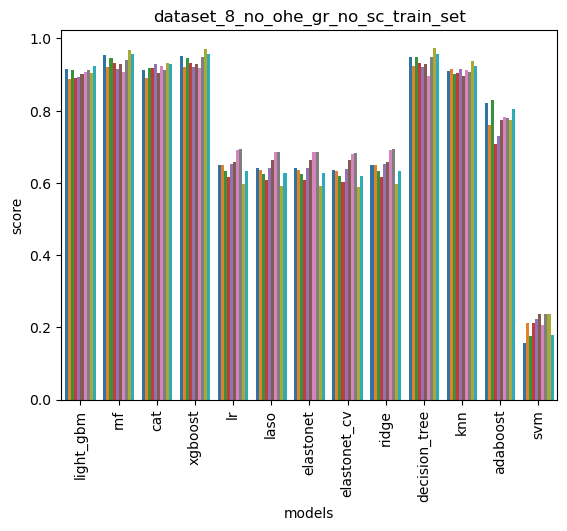

In [43]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_with_sc_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset_8_no_ohe_gr_no_sc_train_set')